In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
pd.set_option('display.max_c', None)




In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

finaldata9['parish'].value_counts()

Sankt Johannes                                                                  4375
Sankt Matthæus                                                                  3684
Almindelig Hospitals (Alm Hospital - AH)                                        2601
Sankt Jakobs (Sankt Jacobs)                                                     2114
Sankt Pauls                                                                     2100
Vor Frue                                                                        1938
Holmens (Skibs)                                                                 1819
Hellig Kors (fra 1890)                                                          1723
Trinitatis                                                                      1707
Sankt Stefans                                                                   1575
Vor Frelsers                                                                    1570
Garnisons Sogn                                                   

In [20]:
finaldata9['event_district_1860s'].value_counts()

københavn             12502
sokkelund               868
lyngekronborg           352
odense                  216
fleskum                 151
hasle                   146
støvring                133
sømme                   129
merløse                 128
slagelse                126
nim                     110
als sønder              105
lyngefrederiksborg      103
lollands nørre          100
haderslev                99
sunds                    97
bårse                    93
tønder højer og lø       90
musse                    87
tybjerg                  85
alsted                   82
smørum                   82
vindinge                 81
vester                   79
horns                    78
sallinge                 75
ringsted                 72
rise                     72
nørre                    71
nørlyng                  71
mønbo                    70
nybøl                    66
elbo                     66
langelands nørre         65
båg                      64
ramsø               

In [3]:
import pandas as pd
from tqdm import tqdm

# Assuming classdf is the dataframe with two columns
# Assuming finaldata is the existing dataframe

# Get the number of iterations for the progress bar
total_iterations = len(finaldata)

# Initialize the progress bar
with tqdm(total=total_iterations, desc='Merging data') as pbar:
    # Perform the merge
    finaldata2 = pd.merge(finaldata, classdf, left_on='deathcauses', right_on='Cause of Death', how='left', validate='m:1', indicator=True)

    # Drop the duplicate column (Cause of Death)
    finaldata2 = finaldata2.drop('Cause of Death', axis=1)

    # Update the progress bar
    pbar.update(len(finaldata2) - pbar.n)

Merging data: 100%|██████████| 70226/70226 [00:00<00:00, 157507.46it/s]


In [ ]:
freq_dist = finaldata2['ICD-10 Code'].value_counts()
freq_table = pd.DataFrame({'Value': freq_dist.index, 'Count': freq_dist.values})
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 60)  # Adjust the maximum width for column display

print(freq_table.sort_values(by='Count', ascending=False))

In [5]:
nan_count = finaldata2['ICD-10 Code'].isna().sum()

print(nan_count)

16554


In [36]:
import numpy as np

# First, rename the 'ICD-10 Code' column in classdf1
classdf1 = classdf1.rename(columns={'ICD-10 Code': 'ICD-10 Code classdf1'})

# Now, merge the two dataframes on the appropriate columns
merged_data = pd.merge(finaldata2, classdf1, left_on='deathcauses', right_on='Cause of Death', how='left')

# If there's a new 'ICD-10 Code' from classdf1, use that one. Otherwise, keep the old one.
merged_data['ICD-10 Code'] = np.where(merged_data['ICD-10 Code classdf1'].isnull(), merged_data['ICD-10 Code'], merged_data['ICD-10 Code classdf1'])

# If you want to drop the auxiliary 'ICD-10 Code classdf1' column, you can do that now:
merged_data = merged_data.drop(columns='ICD-10 Code classdf1')

In [37]:
finaldata3 = merged_data

In [43]:
finaldata3 = finaldata3.drop(columns='Cause of Death')

In [48]:
finaldata4= finaldata3

In [49]:
finaldata4['ICD-10 Code'] = finaldata3['ICD-10 Code'].replace(['nonefound', 'No ICD-10 code found'], np.nan)

In [57]:
death_causes_ICD10 = {
    'Morbus cordis (Mb. cordis, Mb. cord.)': 'I51.9',
    'Tuberculosis pulmonum (Tub. pulm.)': 'A15.0',
    'Phthisis': 'A15.0',
    'Cancer ventriculi (C. ventr.)': 'C16.9',
    'Pneumonia (Pneumoni)': 'J18.9',
    'Apoplexia cerebri': 'I64',
    'Phthisis pulmonum (Phthisis pulm.)': 'A15.0',
    'Bronchopneumonia': 'J18.0',
    'Pneumonia crouposa (Pneumonia croup., Pneum. croup.)': 'J18.1',
    'Lungesvindsot': 'A15.0', # Assumed to be lung tuberculosis
    'Alderdom': 'R54',
    'Apoplexia  (Apopleksi)': 'I64',
    'Lungebetændelse': 'J18.9',
    'Hæmorrhagia cerebri (Haemorrhagia cerebri)': 'I61.9',
    'Senilia': 'R54',
    'Marasmus senilis': 'R54',
    'Pludselig død (Død pludselig)': 'R99',
    'Emollitio cerebri': 'I67.9', # Assumed to be a cerebral condition
    'Alderdomssvaghed': 'R54',
    'Cancer uteri': 'C55',
    'Hængning': 'X70',
    'Kræft': 'C80.1', # General code for malignant neoplasm
    'Tuberculosis (Tuberkulose)': 'A15.9',
    'Senilitas': 'R54',
    'Cancer abdominis (C. abdominalis, C. abdom.)': 'C76.2',
    'Hjertesygdom': 'I51.9',
    'Peritonitis': 'K65.9',
    'Bronchitis (Bronkitis)': 'J40',
    'Cancer hepatis': 'C22.9',
    'Ukendt (Ubekendt, Ubekjendt)': 'R99',
    'Nephritis (Nefritis)': 'N05.9',
    'Influenza,Pneumonia (Pneumoni)': 'J11.0',
    'Lungetuberkulose (Lungetuberculosis, Lungetub.)': 'A15.0',
    'Meningitis': 'G03.9',
    'Nephritis chron. (Nefritis chron.)': 'N03.9',
    'Cancer oesophagi (Cancer øsophagi)': 'C15.9',
    'Brystsyge': 'J98.9', # Assumed to be a respiratory condition
    'Bronchitis chron.': 'J42',
    'Morbus cordis chron. (Morbus chron. cordis, Mb. cord. ch...)': 'I51.9',
    'Cancer recti (C. recti)': 'C20',
    'Febris typhoidea (Fb. typhoidea, Febr. typh.)': 'A01.0',
    'Diphteria (Diphteritis, Difteri)': 'A36.9',
    'Degeneratio myocardii (Deg. myocardii)': 'I51.5',
    'Meningitis tuberculosa (Tuberkuløs meningit.)': 'A17.0',
    'Influenza': 'J11.1',
    'Cancer mammae': 'C50.9',
    'Arteriosclerosis (Arteriosclerose)': 'I70.90',
    'Diabetes mellitus': 'E14.9',
    'Kronisk hjertesygdom (Chronisk Hjertesygdom)': 'I51.6',
    'Morbus Brightii (Mb. Brightii, Brights nyresygdom)': 'N03.9',
    'Cirrhosis hepatis': 'K74.60',
    'Degeneratio cordis (Degen. cordis, Deg. cordis)': 'I51.5',
    'Influenza,Bronchopneumonia': 'J11.0',
    'Organisk hjertesygdom': 'I51.6',
    'Kræft i maven (Mavekræft)': 'C16.9',
    'Tumor cerebri': 'C71.9',
    'Tuberculosis pulmonum et laryngis (Tub. pulmon. et  lary...)': 'A15.3',
    'Cancer': 'C80.1',
    'Scarlatina': 'A38',
    'Uræmia (Uræmi)': 'N19',
    'Drukning (Druknet )': 'X71',
    'Encephalopathia': 'G93.40',
    'Delirium tremens (Delir. tremens, Del. tremens. D. t.)': 'F10.231',
    'Debilitas senilis (Debilitas in senilitate, Debilitas se...)': 'R54',
    'Tuberculosis pulmonum et intestin. (Tub. pulm. et intest...)': 'A15.3',
    'Underlivsbetændelse': 'N71.9', # Assumed to be pelvic inflammatory disease
    'Dementia paralytica': 'A52.1',
    'Hjerneapopleksi (Hjerneapoplexi)': 'I64',
    'Ileus': 'K56.7',
    'Bronchitis capillaris (Bronchit. capill., Bronch. cap.)': 'J40',
    'Cystitis': 'N30.9',
    'Paresis cordis': 'I50.1',
    'Emphysema pulmonum (Emfysema pulm.)': 'J43.9',
    'Paralysis cordis': 'I50.1',
    'Alderdomssvækkelse  (Senil svækkelse)': 'R54',
    'Hjernebetændelse': 'G03.9',
    'Febris puerperalis': 'O85',
    'Kræft i underlivet (Underlivskræft)': 'C57.9',
    'Insufficientia cordis (Insuff. cordis)': 'I50.9',
    'Hjerneblødhed': 'I61.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Paresis cordis': 'I51.9, I50.1',
    'Brystbetændelse': 'N61',
    'Pleuritis': 'J90.9',
    'Cancer ventriculi et hepatis': 'C16.9, C22.9',
    'Influenzapneumoni (Influenzapneumonia)': 'J11.0',
    'Embolia arteriae pulmonalis (Embolia art. pulm.)': 'I26.9',
    'Lungetæring': 'A15.0',
    'Unknown': 'R99',
    'Emphysema (Emphysem, Emfysem)': 'J43.9',
    'Pyæmia (Pyaemia, Pyæmi)': 'A41.9',
    'Kronisk hjernesygdom (Chronisk Hjernesygdom)': 'G93.9',
    'Degeneratio myocardii (Deg. myocardii),Paresis cordis': 'I51.5, I50.1',
    'Pneumonia catarrhalis (Pneumonia cath.)': 'J18.9',
    'Cancer coli (C. coli)': 'C18.9',
    'Erysipelas': 'A46',
    'Cancer intest. (Cancer intestinalis, C. intestin.)': 'C18.9',
    'Febris rheumatica (Fb. rheumatica)': 'I00',
    'Embolia (Emboli)': 'I74.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Nephritis (Nefritis)': 'I51.9, N05.9',
    'Anæmia (Anaemia, Anæmi)': 'D64.9',
    'Selvmord ved hængning (Hængt sig)': 'X70',
    'Nephritis chron. (Nefritis chron.),Uræmia (Uræmi)': 'N03.9, N19',
    'Embolia cerebri': 'I63.4',
    'Anæmia perniciosa': 'D51.0',
    'Epilepsia (Epilepsi)': 'G40.9',
    'Gangræna senilis (Senil gangræn)': 'R02',
    'Tuberculosis miliaris': 'A19.9',
    'Nyrebetændelse': 'N10',
    'Ikke oplyst (Uoplyst, uangivet, ingen dødsårsag angivet)': 'R99',
    'Tæring': 'A15.7', # Tæring is an old term often used to describe tuberculosis
    'Morbus mentalis (Mb. mentalis)': 'F99',
    'Pneumonia chron. (Chronisk Pneumoni)': 'J18.1',
    'Kræft i livmoderen (Livmoderkræft)': 'C55',
    'Ulcus ventriculi (Ulc. ventr.)': 'K25.9',
    'Cystopyelonephritis (Cysto pyelo nephritis)': 'N10',
    'Typhus (Tyfus)': 'A75.9', # Typhus is usually referred to as Rickettsial typhus
    'Myocarditis (Myocarditis cordis)': 'I51.4',
    'Septichæmia  (Septikæmi, Septicaemia )': 'A41.9',
    'Barselfeber (Barselsfeber)': 'O85',
    'Ignota (Causa ignota, Causa mortis ignota)': 'R99',
    'Kronisk lungesygdom (Chronisk Lungesygdom)': 'J98.4',
    'Hæmorrhagia (Haemorrhagia)': 'R58',
    'Hjerneblødning': 'I61.9',
    'Hjernesygdom': 'G93.9',
    'Cholelithiasis': 'K80.8',
    'Phthisis cavernosa': 'A15.0', # Old term for pulmonary tuberculosis
    'Cachexia (Kakexia, Kakeksi)': 'R64',
    'Morbus cordis (Mb. cordis, Mb. cord.),Paralysis cordis': 'I51.9, I50.1',
    'Arteriosclerosis cerebri (Arteriosclerosis cerebralis)': 'I67.2',
    'Nephritis (Nefritis),Uræmia (Uræmi)': 'N05.9, N19',
    'Pneumonia in influenza': 'J10.0',
    'Pleuropneumonia': 'J18.1',
    'Pneumonia dext.': 'J18.1',
    'Pneumonia (Pneumoni),Influenza': 'J11.1',
    'Aneurysma aortae (Aneurisma aortæ)': 'I71.9',
    'Hæmoptysis (Haemophthisis)': 'R04.2',
    'Hæmorrhagia cerebri (Haemorrhagia cerebri),Paresis cordis': 'I61.9, I50.1',
    'Diarré (Diarrhoea, Diarrhé)': 'A09',
    'Pneumonia duplex (Pneumonia utriusque)': 'J18.9',
    'Tumor abdominis': 'C76.2',
    'Gangræna (Gangraena)': 'R02',
    'Pneumonia crouposa dext.': 'J18.0',
    'Vattersot': 'E78.6', # Vattersot is an old term usually used to describe dropsy, which in modern terms could be associated with different forms of edema
    'Cancer pancreatis (C. pancreatis)': 'C25.9',
    'Cancer vesicae': 'C67.9',
    'Tabes dorsalis': 'A52.1',
    'Sequelae apoplexiae cerebri (Apoplexia cerebri sequelae)': 'I69.3',
    'Tyfoid feber (Typhoid Feber)': 'A01.0',
    'Pyelonephritis': 'N12',
    'Kræft i leveren (Leverkræft)': 'C22.0',
    'Arteriosclerosis (Arteriosclerose),Morbus cordis (Mb. cordis, Mb. cord.)': 'I70.9, I51.9',
    'Appendicitis': 'K35.9',
    'Meningitis cerebrospinalis (Cerebrospinalmeningitis)': 'G03.9',
    'Tuberculosis pulmonum (Tub. pulm.),Hæmoptysis (Haemophthisis)': 'A15.0, R04.2',
    'Pludselig død uden kendt årsag (Pludselig død, ubekjendt årsag)': 'R96',
    'Cancer pylori': 'C16.0',
    'Hernia incarcerata (Hernia incar.)': 'K46.1',
    'Pneumonia hypostatica (Pneumonia hypostatica pulm.)': 'J18.2',
    'Kræft i spiserøret (Spiserørskræft)': 'C15.9',
    'Fractura cranii': 'S02.91',
    'Kopper': 'B06.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Bronchitis (Bronkitis)': 'I51.9, J40',
    'Morbus cordis (Mb. cordis, Mb. cord.),Arteriosclerosis (Arteriosclerosis)': 'I51.9, I70.9',
    'Hæmatemesis (Hæmatemese)': 'K92.0',
    'Pneumonia crouposa duplex (Pneumonia crouposa utriusque)': 'J18.0',
    'Croup': 'J05.0',
    'Alcoholismus chronicus (Alch. chr., A.c.)': 'F10.2',
    'Phthisis cavernosa duplex (Phtisis dupl. cav.)': 'A15.0',
    'Tuberculosis pulmonum et laryngis et intestin.': 'A15.3, A15.4, A18.0',
    'Tuberculosis universalis': 'A19.9',
    'Ødema pulmonum (Oedema pulm.)': 'J81',
    'Alcoholismus (Alkoholisme)': 'F10.9',
    'Kronisk nyresygdom (Chronisk Nyresygdom)': 'N18.9',
    'Diabetes': 'E14',
    'Cancer ventriculi (C. ventr.),Paresis cordis': 'C16.9, I50.1',
    'Angina pectoris': 'I20.9',
    'Svindsot': 'R64', # Svindsot is an old term often used for consumption or wasting diseases. Cachexia (R64) might be a suitable code
    'Fractura colli femoris': 'S72.00',
    'Atrophia (Atrofi)': 'M62.50',
    'Influenza,Lungebetændelse': 'J10.0, J18.9',
    'Myelitis': 'G04.9',
    'Veneficium oxydi carbonici (Veneficium oxyd. carbon.)': 'T58',
    'Bronchiectasia (Bronkiektasi)': 'J47',
    'Cholerine (Kolerine)': 'A09.9', # Cholerine was an old term for mild cholera-like symptoms, often due to gastroenteritis
    'Spondylitis': 'M49.9',
    'Senilitas,Arteriosclerosis (Arteriosclerose)': 'R54, I70.9',
    'Arteriosclerosis (Arteriosclerose),Emollitio cerebri': 'I70.9, I67.9', # Emollitio cerebri refers to softening of the brain, which could be due to various causes
    'Druknet ved ulykkestilfælde (Drukning ved ulykkestilfælde)': 'W74',
    'Tuberculosis pulmonum duplex (Tub. pulm. dupl.)': 'A15.0',
    'Morbus cordis (Mb. cordis, Mb. cord.),Insufficientia cordis': 'I51.9, I50.9',
    'Morbus cordis? (Muligvis Morbus cordis)': 'I51.9',
    'Encephalopathia chronica (Encephalopathia chron.)': 'G92',
    'Asthma (Astma)': 'J45.9',
    'Bronchopneumonia in influenza': 'J11.0',
    'Nyresygdom': 'N19',
    'Nephritis chron. (Nefritis chron.),Morbus cordis (Mb. cordis, Mb. cord.)': 'N03.9, I51.9',
    'Cystitis chron.': 'N30.90',
    'Krampe (Kramper)': 'R25.2',
    'Skarlagensfeber': 'A38.9',
    'Hypertrophia prostatae  (Prostatahypertrofi)': 'N40.1',
    'Meningitis cerebrospinalis epidemica': 'A87.0',
    'Sepsis': 'A41.9',
    'Cancer cardiae': 'C16.0',
    'Dementia senilis': 'F03.90',
    'Influenza,Pneumonia duplex (Pneumonia utriusque)': 'J10.0, J18.9',
    'Cancer prostatae': 'C61',
    'Leukaemia (Leuchæmia, Leukæmi)': 'C91.9',
    'Thrombosis arteriae coronariae (Thrombosis art. coron., ...)': 'I25.1',
    'Bronchopneumonia duplex (Bronchopneumonia utriusque)': 'J18.0',
    'Arteriosclerosis cordis': 'I25.1', # Note: This might refer to coronary artery disease
    'Eclampsia (Ecclampsia, Eklampsismus, Eklampsi)': 'O15.9',
    'Emphysema (Emphysem, Emfysem),Bronchitis (Bronkitis)': 'J43.9, J40',
    'Sukkersyge': 'E14',
    'Selvmord ved skud (Selvmord ved skydning, Skudt sig)': 'X72',
    'Hjertelammelse': 'I50.9',
    'Cancer peritonæi (Cancer peritonaei)': 'C48.2',
    'Morbus cerebri (Mb. cerebralis)': 'G93.9', # This could refer to various diseases of the brain
    'Kræft i brystet (Brystkræft)': 'C50.9',
    'Emollitio  (Emollition, Emollitiones)': 'I67.9',
    'Gangræna pulmonum (Gangraena pulm.)': 'J85.1',
    'Cystopyelitis (Cysto-pyelitis)': 'N12',
    'Morbus cordis (Mb. cordis, Mb. cord.),Embolia cerebri': 'I51.9, I63.4',
    'Morbus cordis (Mb. cordis, Mb. cord.),Apoplexia cerebri': 'I51.9, I64',
    'Sindssygdom': 'F99',
    'Arteriosclerosis (Arteriosclerose),Hæmorrhagia cerebri (...)': 'I70.9, I61.9',
    'Bronchopneumonia,Influenza': 'J18.0, J10.0',
    'Peritonitis universalis (Universel peritonitis)': 'K65.0',
    'Phthisis pulmonalis': 'A15.9',
    'Hængning,Selvmord? (Muligvis selvmord)': 'X70',
    'Submersio': 'W74',
    'Senilitas,Bronchitis (Bronkitis)': 'R54, J40',
    'Morbus cordis (Mb. cordis, Mb. cord.),Embolia (Emboli)': 'I51.9, I82.9',
    'Cancer ovarii': 'C56',
    'Pericarditis': 'I31.9',
    'Cancer hepatis et ventriculi': 'C22.9, C16.9',
    'Arteriosclerosis (Arteriosclerose),Degeneratio myocardii...': 'I70.9, I51.5',
    'Pneumonia sin. (Pneumonia sinistra)': 'J18.1',
    'Erysipelas faciei': 'A46',
    'Myelitis chron.': 'G04.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Bronchitis chron.': 'I51.9, J42',
    'Sequelae apoplexiae (Seq. apoplexiae, Apoplexia sequelae)': 'I69.9',
    'Decubitus': 'L89.9',
    'Drukning (Druknet ),Fundet død': 'W74',
    'Vandsot': 'R60.9', # This term is old and refers to edema or dropsy
    'Cancer laryngis': 'C32.9',
    'Scirrhus ventriculi': 'C16.9', # Scirrhous refers to a type of cancer - this likely refers to stomach cancer
    'Paralysis agitans': 'G20', # This is another term for Parkinson's disease
    'Apoplexia cerebri,Arteriosclerosis (Arteriosclerose)': 'I64, I70.9',
    'Kronisk nyrebetændelse (Chronisk Nyrebetændelse)': 'N18.9',
    'Forbrænding': 'T30.0',
    'Arteriosclerosis (Arteriosclerose),Paralysis cordis': 'I70.9, I46.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Nephritis chron. (...)': 'I51.9, N03.9',
    'Phthisis tuberculosa': 'A15.9',
    'Influenza,Bronchitis (Bronkitis)': 'J10.0, J40',
    'Cancer colli (C. colli)': 'C73', # If it refers to thyroid cancer, or C53.9 if it refers to cervical cancer
    'Leversygdom': 'K76.9', # General term for liver disease
    'Nephritis (Nefritis),Morbus cordis (Mb. cordis, Mb. cord.)': 'N05.9, I51.9',
    'Phthisis cavernosa pulm. (Phthisis pulm. cavernosa)': 'A15.0',
    'Catarrhus intestinalis (Cat. intest.)': 'K52.9',
    'Diabetes mellitus,Coma (Koma)': 'E14, R40.2',
    'Icterus': 'R17',
    'Enteritis': 'K52.9',
    'Nedstyrtning': 'W13',
    'Mors subitanea (Mors subita)': 'R96.0',
    'Hjerteslag': 'I49.9', # This could refer to cardiac arrhythmia
    'Veneficium': 'T65.9', # General term for poisoning
    'Arteriosclerosis (Arteriosclerose),Degeneratio cordis (D...': 'I70.9, I51.5',
    'Gigtfeber': 'M00.9', # This likely refers to arthritis 
    'Empyema pleurae': 'J86.9',
    'Gastrisk Feber': 'A09', # This likely refers to gastroenteritis or gastric fever
    'Cancer pulmonum (C. pulm.)': 'C34.9',
    'Strangulatio (Strangulation)': 'T71.1',
    'Diabetes mellitus,Coma diabeticum': 'E14, E11.64',
    'Tumor hepatis': 'C22.9', # This likely refers to liver cancer
    'Morbus cordis mitralis': 'I34.9',
    'Bronchitis (Bronkitis),Emphysema (Emphysem, Emfysem)': 'J40, J43.9',
    'Koldbrand': 'R02', # This is gangrene in Danish
    'Emphysema pulmonum (Emfysema pulm.),Bronchitis (Bronkitis)': 'J43.9, J40',
    'Embolia pulm. (Embolia pulmonum)': 'I26.9',
    'Tumor': 'C80.9',
    'Catarrhus intestinalis acutus (Cat. intest. acut.)': 'K52.9',
    'Morbilli': 'B05.9', # This is measles
    'Endocarditis': 'I33.9',
    'Influenza,Bronchopneumonia duplex (Bronchopneumonia utri...': 'J10.0, J18.9',
    '*tydning eller verificering mangler': 'R99', # Unclear or unverified diagnosis
    'Morbus cordis (Mb. cordis, Mb. cord.),Ødema pulmonum (Oe...': 'I51.9, J81',
    'Senilitas,Bronchopneumonia': 'R54, J18.9',
    'Degeneratio myocardii (Deg. myocardii),Bronchopneumonia': 'I51.5, J18.9',
    'Marasmus (Marasme)': 'E41', # This is severe malnutrition
    'Influenza,Pneumonia crouposa (Pneumonia croup., Pneum. c...': 'J10.0, J18.0',
    'Blærebetændelse': 'N30.9', # This is cystitis or bladder infection
    'Cancer pulmonis': 'C34.9',
    'Cancer pharyngis': 'C10.9',
    'Bronchopneumonia,Morbus cordis (Mb. cordis, Mb. cord.)': 'J18.9, I51.9',
    'Morbus Basedowii (Basedow´s sygdom)': 'E05.0', # This is Graves' disease
    'Debilitas': 'R54', # This is a general term for weakness or frailty, often associated with old age
    'Arteriosclerosis cerebri (Arteriosclerosis cerebralis),B...': 'I67.2',
    'Død uden lægebehandling (død uden lægehjælp)': 'R98', # This is death without medical attention
    'Senilitas,Pneumonia (Pneumoni)': 'R54, J18.9',
    'Lungeemphysem (Lungeemfysem)': 'J43.9', # This is emphysema
    'Morbus cordis (Mb. cordis, Mb. cord.),Pneumonia (Pneumoni)': 'I51.9, J18.9',
    'Suffocatio per suspensionem': 'T71.1',
    'Cancer renis': 'C64.9',
    'Pneumonia crouposa sin.': 'J18.0',
    'Phthisis duplex': 'A15.9',
    'Marasmus senilis,Bronchitis (Bronkitis)': 'R54, J40',
    'Bronchitis (Bronkitis),Senilitas': 'J40, R54',
    'Arteriosclerosis (Arteriosclerose),Senilitas': 'I70.9, R54',
    'Convulsiones (Konvulsioner)': 'R56.9',
    'Tarmkræft': 'C18.9',
    'Phlegmone (Flegmone)': 'L03.9',
    'Bronchitis senilis (Bronchitis in senilitate)': 'J40',
    'Tuberculosis pulmonum (Tub. pulm.),Meningitis tuberculos...': 'A15.9, A17.0',
    'Senilitas,Morbus cordis (Mb. cordis, Mb. cord.)': 'R54, I51.9',
    'Cerebralia': 'R41.9', # This is a general term for brain diseases
    'Bronchopneumonia,Paresis cordis': 'J18.9, I50.1',
    'Brystkatar (Brystcatarrh)': 'J22', # This likely refers to some type of respiratory infection
    'Perityphlitis (Perityflitis)': 'K35.9',
    'Ulykkestilfælde': 'V89.9', # This is an accident, unspecified
    'Apoplexia cerebri,Morbus cordis (Mb. cordis, Mb. cord.)': 'I64, I51.9',
    'Gasforgiftning (Forgiftning ved Gas)': 'T58',
    'Tuberculosis pulmonum (Tub. pulm.),Nephritis (Nefritis)': 'A15.9, N05.9',
    'Kulilteforgiftning (Kulforgiftning)': 'T58',
    'Morbus cordis (Mb. cordis, Mb. cord.),Bronchopneumonia': 'I51.9, J18.9',
    'Rosen': 'L03.0', # This is erysipelas, a skin infection
    'Degeneratio cordis (Degen. cordis, Deg. cordis),Paresis ...': 'I51.5, I50.1',
    'Catarrhus gastrointestinalis (Cat. gastro.)': 'K52.9',
    'Lungesygdom': 'J98.4', # This is a general term for lung disease
    'Cancer linguae (C. linguae)': 'C02.9',
    'Coma diabeticum': 'E11.64',
    'Hjertelidelse': 'I51.9', # This is a general term for heart disease
    'Tuberculosis pulmonum acuta (Tub. pulm. acut.)': 'A15.0',
    'Scorbutus  (Skorbut, Skørbug)': 'E54',
    'Abscessus cerebri': 'G06.0',
    'Kronisk brysttilfælde (Chronisk Brysttilfælde)': 'J98.4', # This likely refers to some type of chronic respiratory disease
    'Hernia': 'K46.9',
    'Morbus organicus cordis (Morbus cordis organicus)': 'I51.9',
    'Underlivssygdom': 'N76.9', # This is a general term for a disease of the female genital tract
    'Tuberculosis pulmonum et intestin. et laryngis': 'A15.9',
    'Kronisk leversygdom (Chronisk Leversygdom))': 'K74.60',
    'Cirrhosis hepatis,Ascites': 'K74.60, R18.8',
    'Ukendt (Ubekendt, Ubekjendt),Pludselig død (Død pludselig)': 'R99',
    'Meningitis cerebralis (Meningitis cerebri, Cerebromening...': 'G03.9',
    'Morbus cordis aortae (Mb. cordis aortae)': 'I35.0',
    'Gangræna pedis': 'I96',
    'Apoplexia cerebri,Paresis cordis': 'I64, I50.1',
    'Brysttæring': 'A15.9', # This is an old term for pulmonary tuberculosis
    'Cancer uteri et vaginae': 'C55',
    'Senilitas,Paresis cordis': 'R54, I50.1',
    'Peritonitis diffusa': 'K65.9',
    'Hængning,Alcoholismus (Alkoholisme)': 'T71.1, F10.9',
    'Peritonitis e perforatione (Perforationsperitonitis)': 'K65.0',
    'Diphteria faucium (Diphteritis fauc.)': 'A36.9',
    'Arthritis deformans (Artritis deformans)': 'M15.9',
    'Kronisk lungebetændelse (Chronisk Lungebetændelse)': 'J44.9',
    'Exhaustio virium': 'R53', # This is a general term for malaise and fatigue
    'Morbus hepatis (Mb. hepatis, Mb. hepaticus)': 'K76.9',
    'Anæmia gravis (Anaemia gravis)': 'D64.9',
    'Carcinoma ventriculi (Carcinoma ventr.)': 'C16.9',
    'Katarrhalsk lungebetændelse (Catarrhalsk Lungebetændelse)': 'J18.9',
    'Dysenteri (Dysenteria)': 'A09.0',
    'Thrombosis arteriae coronariae (Thrombosis art. coron., ...': 'I21.9',
    'Indbragt død (Død indbragt)': 'R99', # This means the person was brought in dead
    'Sarcoma (Sarkom)': 'C49.9',
    'Nedstyrtning ved ulykkestilfælde': 'W17.9', # This is a fall accident
    'Appendicitis,Peritonitis': 'K35.9, K65.9',
    'Empyema (Empyem)': 'J86.9',
    'Hydrocephalus (Hydrocefalus)': 'G91.9',
    'Blodbrækning': 'K92.0', # This is an episode of vomiting blood
    'Kighoste': 'A37.9',
    'Tussis convulsiva': 'A37.9', # This is another term for pertussis, or whooping cough
    'Myelopathia': 'G95.9',
    '*kan ikke læses': 'Z04.8', # This means "cannot be read"
    'Diabetes mellitus,Paresis cordis': 'E14.9, I50.1',
    'Kronisk bronkitis (Chronisk Bronchitis)': 'J42',
    'Emollitio cerebri,Arteriosclerosis (Arteriosclerose)': 'G93.9, I70.9',
    'Emphysema pulmonum (Emfysema pulm.),Bronchitis chron.': 'J43.9, J42',
    'Morbus cordis (Mb. cordis, Mb. cord.),Infarctus pulmonum...': 'I51.9, I26.9',
    'Senilitas,Degeneratio myocardii (Deg. myocardii)': 'R54, I51.5',
    'Peritonitis puerperalis (Peritonitis e puerperio)': 'O85',
    'Suicidium': 'X84.9', # This is a general term for suicide
    'Tumor ovarii': 'C56',
    'Influenza,Marasmus senilis': 'J10.1, R54',
    'Suspensio': 'T71.1', # This is a general term for hanging as a cause of death
    'Arteriosclerosis (Arteriosclerose),Apoplexia cerebri': 'I70.9, I64',
    'Pneumonia crouposa (Pneumonia croup., Pneum. croup.),Mor...': 'J18.0, I51.9',
    'Febris rheumatica (Fb. rheumatica),Morbus cordis (Mb. co...': 'I00, I51.9',
    'Phthisis pulmonum duplex (Phthisis pulm. duplex)': 'A15.9',
    'Indeklemt brok': 'K40.9', # This is a term for incarcerated hernia
    'Degeneratio myocardii (Deg. myocardii),Paralysis cordis': 'I51.5, I50.1',
    'Brystsygdom': 'J98.4', # This likely refers to some type of chest disease
    'Influenza,Paralysis cordis': 'J10.1, I50.1',
    'Nephritis acuta': 'N00.9',
    'Pludselig død (Død pludselig),Morbus cordis (Mb. cordis,...': 'R96, I51.9',
    'Kronisk nyre- og hjertesygdom (Chronisk Nyre og Hjertesy...': 'N18.9, I51.9',
    'Emphysema pulmonum (Emfysema pulm.),Morbus cordis (Mb. c...': 'J43.9, I51.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Ødema (Oedema)': 'I51.9, R60.9', # Morbus cordis is a general term for heart disease and Oedema refers to swelling caused by excess fluid
    'Blodstyrtning': 'R58', # This is a Danish term for hemorrhage or bleeding
    'Morbus cerebri chronicus (Morb. chr. cerebri)': 'G93.9', 
    'Tarmslyng (Tarmslyngning)': 'K56.6',
    'Tuberculosis miliaris acuta': 'A19.9',
    'Degeneratio myocardii (Deg. myocardii),Insufficientia co...': 'I51.5, I50.9',
    'Lungehindebetændelse': 'J18.9',
    'Hemiplegia (Hemiplegi)': 'G81.9',
    'Bronchitis chron.,Morbus cordis (Mb. cordis, Mb. cord.)': 'J42, I51.9',
    'Kronisk alkoholisme (Chronisk Alcoholisme)': 'F10.2',
    'Endocarditis ulcerosa (Endocard. ulc., Ulcerøs endocardi...': 'I33.0',
    'Senilitas,Degeneratio cordis (Degen. cordis, Deg. cordis)': 'R54, I51.5',
    'Bronchitis chron.,Emphysema pulmonum (Emfysema pulm.)': 'J42, J43.9',
    'Arteriosclerosis (Arteriosclerose),Bronchopneumonia': 'I70.9, J18.9',
    'Peritonitis acuta (Acut peritonitis)': 'K65.9',
    'Tuberculosis peritonæi (Tuberculosis peritonealis)': 'A18.3',
    'Tumor mediastini': 'C38.3',
    'Hæmorrhagia cerebri (Haemorrhagia cerebri),Arteriosclero...': 'I61.9, I70.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Senilitas': 'I51.9, R54',
    'Senilia,Bronchitis (Bronkitis)': 'R54, J40',
    'Bughindebetændelse': 'K65.9',
    'Ileus,Peritonitis': 'K56.7, K65.9',
    'Kronisk brystsygdom (Chronisk Brystsygdom)': 'J98.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Senilia': 'I51.9, R54',
    'Bronchitis chron.,Emphysema (Emphysem, Emfysem)': 'J42, J43.9',
    'Blodprop': 'I82.9',
    'Thrombosis cerebri': 'I63.6',
    'Myocarditis chron.': 'I51.4',
    'Cholecystitis': 'K81.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Ødemata (Oedemata,...': 'I51.9, R60.9',
    'Selvmord ved hængning (Hængt sig),Alcoholismus (Alkoholi...': 'X70, F10.9',
    'Encephalitis': 'G04.9',
    'Forgiftning': 'T65.9',
    'Formentlig drukning ved ulykkestilfælde,Fundet død': 'W74, R98',
    'Bronchopneumonia duplex in influenza': 'J11.0',
    'Cancer coli (C. coli),Paresis cordis': 'C18.9, I50.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Influenza': 'I51.9, J11.1',
    'Bronchitis acuta': 'J20.9',
    'Senilia,Bronchitis chron.': 'R54, J42',
    'Hypertrophia prostatae  (Prostatahypertrofi),Uræmia (Uræmi)': 'N40, N19',
    'Selvmord ved drukning': 'X71',
    'Atrophia cerebri': 'G31.0',
    'Morbus cordis (Mb. cordis, Mb. cord.),Emphysema pulmonum...': 'I51.9, J43.9',
    'Arteriosclerosis (Arteriosclerose),Paresis cordis': 'I70.9, I50.9',
    'Cancer recti (C. recti),Paresis cordis': 'C20, I50.9',
    'Syphilis (Syfilis)': 'A53.9',
    'Febris gastrica  (Febr. gastr.)': 'K29.9',
    'Tuberculosis pulmonum (Tub. pulm.),Morbus cordis (Mb. co...': 'A15.9, I51.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Anasarca (Anasarka)': 'I51.9, R60.1',
    'Bronchitis (Bronkitis),Morbus cordis (Mb. cordis, Mb. co...': 'J40, I51.9',
    'Sequelae cancer mammae (Cancer mammae seq.)': 'C79.81',
    'Bronchitis (Bronkitis),Senilia': 'J40, R54',
    'Scarlatina,Diphteria (Diphteritis, Difteri)': 'A38, A36.9',
    'Ulcus ventriculi (Ulc. ventr.),Hæmatemesis (Hæmatemese)': 'K25.9, K92.0',
    'Aneurysma  (Aneurisme)': 'I72.9',
    'Ascites': 'R18.8',
    'Pyelitis': 'N10',
    'Cancer colli uteri (C. colli uteri)': 'C53.9',
    'Sarcoma abdominis': 'C49.4',
    'Tumor pulmonum (Tumor pulm.)': 'C34.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Degeneratio myocar...': 'I51.9, I51.5',
    'Influenza,Pneumonia catarrhalis (Pneumonia cath.)': 'J11.1, J18.9',
    'Senilitas,Paralysis cordis': 'R54, I50.9',
    'Bronchopneumonia dext.': 'J18.1',
    'Strubehoste': 'J38.0',
    'Morbus cordis incompensatus (Mb. cordis incompens.)': 'I51.9',
    'Fractura colli femoris,Pneumonia (Pneumoni)': 'S72.0, J18.9',
    'Bronchopneumonia,Degeneratio cordis (Degen. cordis, Deg....': 'J18.9, I51.5',
    'Mæslinger': 'B05.9',
    'Abscessus hepatis': 'K75.0',
    'Tetanus': 'A35',
    'Embolia cerebri,Morbus cordis (Mb. cordis, Mb. cord.)': 'I63.9, I51.9',
    'Marasmus senilis,Arteriosclerosis (Arteriosclerose)': 'R64, I70.9',
    'Senilitas,Bronchitis chron.': 'R54, J42',
    'Pneumonia (Pneumoni),Morbus cordis (Mb. cordis, Mb. cord.)': 'J18.9, I51.9',
    'Arteriosclerosis (Arteriosclerose),Marasmus senilis': 'I70.9, R64',
    'Pleuropneumonia dext.': 'J86.0',
    'Arthritis (Artritis, Arthroitis)': 'M19.90',
    'Selvmord ved revolverskud': 'X74',
    'Arteriosclerosis universalis': 'I70.9',
    'Kronisk underlivssygdom  (Chronisk Underlivssygdom)': 'N94.6',
    'Krupøs lungebetændelse (Croupøs Lungebetændelse)': 'J18.1',
    'Kronisk rygmarvssygdom  (Chronisk Rygmarvssygdom)': 'G95.9',
    'Scirrhus': 'C50.919',
    'Influenza,Bronchitis capillaris (Bronchit. capill., Bron...': 'J11.1, J40',
    'Brud af hjerneskallen (Brud af hovedskallen)': 'S02.91',
    'Appendicitis acuta': 'K35.9',
    'Influenza,Pneumonia dext.': 'J11.1, J18.1',
    'Morbus Addison (Mb. Addisonii, Addisons sygdom))': 'E27.1',
    'Bronchitis (Bronkitis),Bronchopneumonia': 'J40, J18.9',
    'Organisk hjertefejl': 'I51.9',
    'Nephritis chron. (Nefritis chron.),Paresis cordis': 'N03.9, I50.9',
    'Tuberculosis pulmonum (Tub. pulm.),Laryngitis': 'A15.9, J04.0',
    'Kræft i endetarmen (Endetarmskræft)': 'C20',
    'Scrophulosis (Skrofulose)': 'A18.0',
    'Hæmorrhagia cerebri (Haemorrhagia cerebri),Bronchopneumonia': 'I61.9, J18.9',
    'Strictura oesophagi (Strictura øsophagi)': 'K22.2',
    'Karbolsyreforgiftning (Forgiftning ved Carbolsyre)': 'T65.2',
    'Pneumonia crouposa (Pneumonia croup., Pneum. croup.),Del...': 'J18.1',
    'Sequelae hæmorrhagiae cerebri (Hæmorrhagia cerebri seq.)': 'I69.0',
    'Hepatitis': 'K75.9',
    'Catarrhus gastrointestinalis acutus (Catarrh. gastro in...': 'K52.9',
    'Peritonitis tuberculosa': 'A18.31',
    'Fractura baseos cranii (Fractura basis cranii)': 'S02.91',
    'Emollitio cerebri,Paresis cordis': 'G93.6, I50.9',
    'Kræft i nyren (Nyrekræft)': 'C64.9',
    'Debilitas senilis (Debilitas in senilitate, Debilitas se...': 'R54',
    'Pneumonia (Pneumoni),Delirium tremens (Delir. tremens, D...': 'J18.9, F10.231',
    'Hængning,Fundet død': 'X70, R99',
    'Druknet ved ulykkestilfælde (Drukning ved ulykkestilfæld...': 'W74',
    'Morbus cordis (Mb. cordis, Mb. cord.),Pludselig død (Død...': 'I51.9, R96.0',
    'Encephalitis chron.': 'G05.1',
    'Hjertelamhed': 'I50.9',
    'Tuberculosis pulmonum (Tub. pulm.),Influenza': 'A15.9, J11.1',
    'Hjernelidelse': 'G93.9',
    'Ruptura cordis': 'I23.5',
    'Nyre- og blærebetændelse': 'N39.0',
    'Influenza,Bronchitis chron.': 'J11.1, J42',
    'Bronchitis chron.,Influenza': 'J42, J11.1',
    'Hypertrophia prostatae (Prostatahypertrofi),Cystitis': 'N40, N30.9',
    'Cancer ventriculi (C. ventr.),Hæmatemesis (Hæmatemese)': 'C16.9, K92.0',
    'Tuberculosis pulmonum (Tub. pulm.),Meningitis': 'A15.9, G03.9',
    'Pludselig død (Død pludselig),Hjerteslag': 'R96.0, I46.9',
    'Marasmus senilis,Cystitis': 'R64, N30.9',
    'Morbus cordis (Mb. cordis, Mb. cord.),Cirrhosis hepatis': 'I51.9, K74.60',
    'Pludselig død (Død pludselig),Apoplexia cerebri': 'R96.0, I64',
    'Sclerosis art. coron.': 'I25.10',
    'Delirium tremens (Delir. tremens, Del. tremens. D. t.),P...': 'F10.231, J18.9',
    'Kronisk hjerte- og nyresygdom': 'I13.2',
    'Emollitio cerebri,Bronchopneumonia': 'G93.6, J18.9',
    'Hæmoptysis (Haemophthisis),Tuberculosis pulmonum (Tub. p...': 'R04.2, A15.9',
    'Tuberculosis intestini et pulmonum': 'A18.0, A15.9',
    'Bronchopneumonia,Senilitas': 'J18.9, R54',
    'Cancer thoracis': 'C78.2',
    'Senilia,Morbus cordis (Mb. cordis, Mb. cord.)': 'R54, I51.9',
    'Lungeødem (Lungeoedem)': 'J81',
    'Abscessus (Absces)': 'L02.91',
    'Pludselig død (Død pludselig),Ukendt (Ubekendt, Ubekjendt)': 'R96.0, R99',
    'Hjernetilfælde': 'I64',
    'Rheumatisk feber': 'I00',
    'Hængning,Melancholia (Melankoli)': 'X70, F32.4',
    'Bronchopneumonia sin.': 'J18.9',
    'Ansigtsrosen': 'A46',
    'Hypertrophia prostatae (Prostatahypertrofi),Pneumonia (...': 'N40, J18.9',
    'Rygmarvstæring': 'G95.9',
    'Phthisis pulmonum et laryngis': 'A15.9',
    'Apoplexia cerebri,Pneumonia (Pneumoni)': 'I64, J18.9',
    'Tarmsår': 'K63.0',
    'Formentlig drukning': 'W74',
    'Pneumonia duplex (Pneumonia utriusque),Influenza': 'J18.9, J11.1',
    'Fibroma uteri': 'D25.9',
    'Encephalopathia luetica (Encephalopathia syphilitica)': 'A52.17',
    'Bronchitis chron.,Bronchopneumonia': 'J42, J18.9',

}






In [59]:
finaldata5['ICD-10 Code'] = finaldata5.apply(lambda row: death_causes_ICD10.get(row['deathcauses'], row['ICD-10 Code']), axis=1)




In [63]:
finaldata6 = finaldata5

In [64]:
death_causes_dict2 = {
  "Hernia": "K40",
  "Fractura baseos cranii (Fractura basis cranii)": "S02.1",
  "Brok": "K40",
  "Tuberculosis urogenitalis": "A18.1",
  "Lungesyge": "J98.9",
  "Pectoralia": "J98.9",
  "Kronisk nyrelidelse": "N18.9",
  "Cancer,*tydning eller verificering mangler": "C80.9",
  "Pectoralia chron.": "J98.9",
  "Selvmord ved hængning (Hængt sig),Sygdom (formodet bevæggrund: Sygdom)": "X70",
  "Hektik (Hectik)": "R50.9",
  "Rosenfeber": "A38",
  "Cerebralia acuta": "G93.9",
  "Collapsus": "R55",
  "Pneumonia catarrhalis duplex": "J18.9",
  "Dræbt eller kvæstet ved togulykken i Gentofte den 11. juli 1897": "V87",
  "Hidsig Feber": "R50.9",
  "Fundet død,Veneficium": "R99",
  "Morbus Brightii (Mb. Brightii, Brights nyresygdom),Morbus cordis (Mb. cordis, Mb. cord.)": "I51.9",
  "Mavekatar (Mavecatarrh)": "K29.7",
  "Pleuritis,Morbus cordis (Mb. cordis, Mb. cord.)": "I51.9",
  "Kirtelsyge (Kirtler, Kiertler)": "R59.9",
  "Blodgang": "K92.2",
  "Brystlidelse": "J98.9",
  "Bugvattersot": "K70.3",
  "Stikflod": "T78.2",
  "Angina": "I20.9",
  "Strubetæring": "A15.8",
  "Benedder": "K13.7",
  "Cancer ventriculi (med 'kaffegrums' opkastning)": "C16.9",
  "Hjerneaffektion (Hjerneaffection)": "G93.9",
  "Bronchiedilatation": "J47",
  "Tuberculosis pulmonum (Tub. pulm.),Tuberculosis urogenitalis": "A15.0",
  "Cholerine (Kolerine),Katar (Catarrh)": "A09",
  "Hængning,Sygdom (formodet bevæggrund: Sygdom)": "X70",
  "Febris carosa": "A39.2",
  "Blodsygdom": "D69.6",
  "Kronisk sygdom (Chronisk Sygdom)": "R53",
  "Kirteltæring (Kjerteltæring)": "A15.7",
  "Apoplexia cerebri,Pneumonia dext.": "I64",
  "Hængning,Sygdom (formodet bevæggrund: Sygdom),Lungetuberkulose (Lungetuberculosis, Lungetub.)": "X70",
  "Indvendig sygdom (Indvortes Sygdom)": "R53",
  "Abscessus perirectalis (Abscessus periproctalis)": "K61.0",
  "Uangivet  (Uang., Uangiven sygdom)": "R69",
  "Tumor,*tydning eller verificering mangler": "D48.9",
  "Slimfeber": "A09",
  "Underlivslidelse": "R10.2",
  "Erysipelas,*tydning eller verificering mangler": "A46",
  "Cerebrallidelse (Cerebral lidelse)": "G93.9",
  "Hængning,Smertefuld sygdom (formodet bevæggrund: Smertefuld sygdom)": "X70",
  "Pectoralia acuta (Pector. acuta)": "J98.9",
  "Morbus chronicus (Mb. chr.)": "R53",
  "Hårdt såret": "T14.9",
  "Vandrerosen": "A46",
  "Diarré (Diarrhoea, Diarrhé),*tydning eller verificering mangler,Cancer": "K52.9",
  "Kronisk indvortes sygdom": "R53",
  "Tumor cerebri,Pneumonia dext.": "C71.9",
  "Fedthjerte": "I51.6",
  "Bronchitis universalis": "J40",
  "Scarlatina,Angina": "A38.0",
  "Hydrops,Ignota (Causa ignota, Causa mortis ignota)": "R69",
  "Catarrhus ventriculi (Cat. ventr.),Enteritis": "K29.7"
}

In [73]:
finaldata6.loc[finaldata6['deathcauses'].str.strip() == 'Hernia', 'ICD-10 Code'] = 'K40'

In [107]:
finaldata6.loc[finaldata6['deathcauses'].str.strip() == 'Abscessus perirectalis (Abscessus periproctalis)', 'ICD-10 Code'] = 'K61.0'

In [1]:
nan_icd10_deathcauses = finaldata6['deathcauses'][finaldata6['ICD-10 Code'].isna()]
nan_icd10_deathcauses_counts = nan_icd10_deathcauses.value_counts()
print(nan_icd10_deathcauses_counts)

NameError: name 'finaldata6' is not defined

In [ ]:
classdf1['ICD-10 Code'] = classdf1['ICD-10 Code'].str.rsplit(',').str[-1]

In [23]:
finaldata6 = pd.read_csv('finaldata6.csv')

C:\Users\juliu\AppData\Local\Temp\ipykernel_8564\1285534113.py:1: DtypeWarning: Columns (12,18,27,28,29,30,31,32,33,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  finaldata6 = pd.read_csv('finaldata6.csv')


In [25]:
finaldata6 = finaldata6.reset_index(drop=True)

In [26]:
finaldata6['deathcauses'] = finaldata6['deathcauses'].str.lower()

In [31]:
whitespace_count = finaldata6['deathcauses'].str.strip().isna().sum()
print(whitespace_count)

97


In [38]:
nan_icd10_rows = finaldata6[finaldata6['deathcauses'].isna()]
nan_icd10_rows.info()
nan_icd10_rows.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 758 to 69677
Columns: 141 entries, source_ids to ICD-10 Code
dtypes: float64(20), int64(1), object(120)
memory usage: 107.6+ KB


,source_ids,n_sources,name_cl,name,first_names,patronyms,family_names,maiden_names,all_patronyms,all_family_names,uncat_names,sex,marital_status_1787s,age_1787s,birth_date,birth_year,birth_month,birth_day,event_date_1787s,birth_place_cl,birth_place,birth_location,birth_parish,birth_town,birth_county,birth_foreign_place,birth_country,event_parish_1787s,event_district_1787s,event_town_1787s,event_county_1787s,event_country_1787s,household_position_1787s,marital_status_1801s,age_1801s,event_date_1801s,event_parish_1801s,event_district_1801s,event_town_1801s,event_county_1801s,event_country_1801s,household_position_1801s,marital_status_1834s,age_1834s,event_date_1834s,event_parish_1834s,event_district_1834s,event_town_1834s,event_county_1834s,event_country_1834s,household_position_1834s,marital_status_1840s,age_1840s,event_date_1840s,event_parish_1840s,event_district_1840s,event_town_1840s,event_county_1840s,event_country_1840s,household_position_1840s,marital_status_1845s,age_1845s,event_date_1845s,event_parish_1845s,event_district_1845s,event_town_1845s,event_county_1845s,event_country_1845s,household_position_1845s,marital_status_1850s,age_1850s,event_date_1850s,event_parish_1850s,event_district_1850s,event_town_1850s,event_county_1850s,event_country_1850s,household_position_1850s,marital_status_1860s,age_1860s,event_date_1860s,event_parish_1860s,event_district_1860s,event_town_1860s,event_county_1860s,event_country_1860s,household_position_1860s,marital_status_1880s,age_1880s,event_date_1880s,event_parish_1880s,event_district_1880s,event_town_1880s,event_county_1880s,event_country_1880s,household_position_1880s,marital_status_1885s,age_1885s,event_date_1885s,event_district_1885s,event_town_1885s,event_county_1885s,event_country_1885s,household_position_1885s,marital_status_1901s,age_1901s,event_date_1901s,event_parish_1901s,event_district_1901s,event_town_1901s,event_county_1901s,event_country_1901s,household_position_1901s,ageYears,ageMonth,ageWeeks,ageDays,ageHours,dateOfDeath,deathplace,civilstatus,adressOutsideCph,comment,cemetary,chapel,parish,street,hood,street_number,letter,floor,institution,institution_street,institution_hood,institution_street_unique,institution_street_number,positions,relationtypes,workplaces,deathcauses,ICD-10 Code
29066,"3,4,5,6,10",5,andreas weikop,andreas reik,andreas,NaN,reik,NaN,NaN,reik,NaN,m,NaN,NaN,NaN,1839.0,NaN,NaN,NaN,københavn,københavn,NaN,NaN,københavn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ugift,1.0,1840-02-01,NaN,københavn,københavn,københavn,Danmark,barn,ugift,7.0,1845-02-01,NaN,københavn,københavn,københavn,Danmark,NaN,ugift,12.0,1850-02-01,NaN,københavn,københavn,københavn,Danmark,barn,ugift,21.0,1860-02-01,NaN,københavn,københavn,københavn,Danmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1863-03-01,NaN,NaN,NaN,"Holmen KM: død 11-03-1863 af hjerneblødhed, 24...",Holmens Kirkegård (Skibs),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arbejdsmand (Arbeidsmand - Arbejder - Arbeider),Eget erhverv,NaN,NaN,NaN
60928,"8,10",2,marie mindeline olsen,marie mikaeline olesen,marie mikaeline,olesen,NaN,NaN,olesen,NaN,NaN,f,NaN,NaN,NaN,1805.0,NaN,NaN,NaN,kjøbenhavn,københavn,NaN,NaN,københavn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ugift,80.0,1885-02-01,københavn,københavn,københavn,Danmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,1890-04-10,NaN,Ugift,NaN,NaN,Vestre Kirkegård,Almindelig Hospital (Alm Hospital - AH),Almindelig Hospitals (Alm Hospital - AH),NaN,NaN,26.0,NaN,NaN,Almindelig Hospital (AH),Amaliegade,Indre By,Amaliegade,26.0,NaN,NaN,NaN,NaN,NaN
39824,"12,6,10",3,ado

In [22]:
nan_count = finaldata7['ICD-10 Code'].isna().sum() + (finaldata7['ICD-10 Code']).count()

print(nan_count)

70226


In [5]:
duplicate_rows = finaldata7[finaldata7.duplicated(subset='name_cl', keep=False)]

display(duplicate_rows)

,source_ids,n_sources,name_cl,name,first_names,patronyms,family_names,maiden_names,all_patronyms,all_family_names,uncat_names,sex,marital_status_1787s,age_1787s,birth_date,birth_year,birth_month,birth_day,event_date_1787s,birth_place_cl,birth_place,birth_location,birth_parish,birth_town,birth_county,birth_foreign_place,birth_country,event_parish_1787s,event_district_1787s,event_town_1787s,event_county_1787s,event_country_1787s,household_position_1787s,marital_status_1801s,age_1801s,event_date_1801s,event_parish_1801s,event_district_1801s,event_town_1801s,event_county_1801s,event_country_1801s,household_position_1801s,marital_status_1834s,age_1834s,event_date_1834s,event_parish_1834s,event_district_1834s,event_town_1834s,event_county_1834s,event_country_1834s,household_position_1834s,marital_status_1840s,age_1840s,event_date_1840s,event_parish_1840s,event_district_1840s,event_town_1840s,event_county_1840s,event_country_1840s,household_position_1840s,marital_status_1845s,age_1845s,event_date_1845s,event_parish_1845s,event_district_1845s,event_town_1845s,event_county_1845s,event_country_1845s,household_position_1845s,marital_status_1850s,age_1850s,event_date_1850s,event_parish_1850s,event_district_1850s,event_town_1850s,event_county_1850s,event_country_1850s,household_position_1850s,marital_status_1860s,age_1860s,event_date_1860s,event_parish_1860s,event_district_1860s,event_town_1860s,event_county_1860s,event_country_1860s,household_position_1860s,marital_status_1880s,age_1880s,event_date_1880s,event_parish_1880s,event_district_1880s,event_town_1880s,event_county_1880s,event_country_1880s,household_position_1880s,marital_status_1885s,age_1885s,event_date_1885s,event_district_1885s,event_town_1885s,event_county_1885s,event_country_1885s,household_position_1885s,marital_status_1901s,age_1901s,event_date_1901s,event_parish_1901s,event_district_1901s,event_town_1901s,event_county_1901s,event_country_1901s,household_position_1901s,ageYears,ageMonth,ageWeeks,ageDays,ageHours,dateOfDeath,deathplace,civilstatus,adressOutsideCph,comment,cemetary,chapel,parish,street,hood,street_number,letter,floor,institution,institution_street,institution_hood,institution_street_unique,institution_street_number,positions,relationtypes,workplaces,deathcauses,ICD-10 Code,deathcause category
4,"5,6,10",3,christian hansen,kristian hansen,kristian,hansen,NaN,NaN,hansen,NaN,NaN,m,NaN,NaN,NaN,1805.0,NaN,NaN,NaN,københavn,københavn,NaN,NaN,københavn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gift,45.0,1850-02-01,tjæreby,vester flakkebjerg,NaN,sorø,Danmark,NaN,gift,57.0,1860-02-01,NaN,københavn,københavn,københavn,Danmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,1875-07-21,NaN,Gift,NaN,NaN,Garnisons (Garnisons Kirkegård),"Garnison, Kapel",NaN,Dronningens Tværgade,Indre By,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Toldassistent,Eget erhverv,NaN,uræmia (uræmi),N19,Kidney and renal diseases
6,"6,7,13,9,10",5,karen marie jensen,karen marie jensen,karen marie,jensen,kærgård,NaN,jensen,kærgård,NaN,f,NaN,NaN,1857-11-15,1857.0,11.0,15.0,NaN,her i sognet,her i sogn,NaN,madum,NaN,ringkøbing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ugift,3.0,1860-02-01,madum,ulfborg,NaN,ringkøbing,Danmark,barn,ugift,22.0,1880-02-01,madum,ulfborg,NaN,ringkøbing,Danmark,tjeneste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gift,44.0,1901-02-01,staby,ulfborg,NaN,ringkøbing,Danmark,husmoder,75.0,NaN,NaN,NaN,NaN,1930-01-23,NaN,Skilt,NaN,NaN,Vestre Kirkegård,Nordre Kapel - Vestre (Ndr),"De Gamles By, Nørre Allé, København (1918- )",NaN,NaN,41.0,NaN,NaN,"De Gamles By, Nørre Alle, København - (1919 - )",Nørre Allé,Nørrebro,Nørre Al

In [40]:
nan_icd10_deathcauses = finaldata6['deathcauses'][finaldata6['ICD-10 Code'].isna()]
nan_icd10_deathcauses_counts = nan_icd10_deathcauses.value_counts()
pd.set_option('display.max_rows', None)
display(nan_icd10_deathcauses_counts)

kronisk brystsygdom (chronisk brystsygdom),tuberculosis (tuberkulose)                                                                                                      1
tuberculosis (tuberkulose),albuminuria                                                                                                                                     1
bronchitis foetida,nephritis (nefritis),anæmia (anaemia, anæmi)                                                                                                            1
selvmord ved hængning (hængt sig),sygdom (formodet bevæggrund: sygdom),tuberculosis (tuberkulose)                                                                          1
pludselig død (død pludselig),emphysema pulmonum (emfysema pulm.),bronchitis chron.                                                                                        1
carcinoma,pharyngitis                                                                                                                  

In [41]:
nan_icd10_deathcauses_counts.to_csv('nan_icd10_deathcauses_counts.csv', index=False)

In [42]:
freq_dist = finaldata6['ICD-10 Code'].value_counts()
freq_table = pd.DataFrame({'Value': freq_dist.index, 'Count': freq_dist.values})
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 60)  # Adjust the maximum width for column display

print(freq_table.sort_values(by='Count', ascending=False))

                    Value  Count
0                   A15.0   6841
1                     R54   3299
2                   I51.9   3236
3                   J18.9   2330
4                     I64   2058
5                   C16.9   1866
6                     R99   1245
7                   J18.1   1057
8                   J18.0   1011
9                   I61.9    805
10                    X70    694
11                  J11.0    691
12                  C80.1    647
13                    C55    609
14                  A15.9    603
15                  I67.9    590
16                    J40    537
17                  N03.9    520
18                  G03.9    515
19                  C76.2    510
20                  K65.9    487
21                  I51.5    452
22                  I25.1    443
23                  I50.9    427
24                  C22.9    409
25                  J11.1    395
26                  I51.6    382
27                  J18.9    371
28                  N05.9    363
29        

In [142]:
finaldata7 = finaldata6

In [ ]:
finaldata7['ICD-10 Code'] = finaldata7['ICD-10 Code'].str.strip()

import numpy as np
finaldata7['ICD-10 Code'] = finaldata7['ICD-10 Code'].replace('nonefound', np.nan)

In [ ]:
{
    'A00-A14.99': 'Cholera, Typhus, and other infectious diseases',
    'A15-A19.99': 'Tuberculosis', 
    'A20-A29.99': 'Cholera, Typhus, and other infectious diseases',
    'A30-A39.99': 'Cholera, Typhus, and other infectious diseases',
    'A40-A49.99': 'Cholera, Typhus, and other infectious diseases',
    'A75-A79.99': 'Cholera, Typhus, and other infectious diseases',
    'A50-A74.99': "Sexual and diseases of the genitals",
    'B15-B19.99': "Sexual and diseases of the genitals",
    'N40-N99.99': "Sexual and diseases of the genitals",
    'R54': 'Senility and Unspecified Age-related',
    'I05-I52.99': 'Heart failure and vascular diseases',
    'J00-J99.99': 'Pneumonia, Influenza, Bronchitis, and Respiratory Infections',
    'N60-N61.99': 'Pneumonia, Influenza, Bronchitis, and Respiratory Infections',
    'C00-D49.99': 'Cancer',
    'E40-E64.99': 'Malnutrition',
    'F00-F99.99': 'Mental disorders',
    'G00-G99.99': 'Nervous system disorders',
    'M62.50': 'Nervous system disorders',
    'E00-E39.99': 'Diabetes and endocrine diseases',
    'I60-I69.99': 'Cerebrovascular(hjerneblødning)',
    'I70-I99.99': 'Heart failure and vascular diseases',
    'I00': 'Cholera, Typhus, and other infectious diseases',
    'O00-O99.9': 'Pregnancy and childbirth',
    'P00-P99.99': 'Pregnancy and childbirth',
    'N00-N59.99': 'Kidney and renal diseases',
    'K00-K95.99': 'Diseases of the digestive system(Peritonitis, intestinal disease, appendictis, gall bladder)',
    'R96-R99.99': 'Sudden death',
    'S00-X69.99': 'Injury, poisoning, accidents, homicide',
    'X84-Y99.99': 'Injury, poisoning, accidents, homicide',
    'X70-X83.99': 'Suicide',
}

In [17]:
death_cause_categories = {
    'A00-B99': 'Certain infectious and parasitic diseases',
    'C00-D49': 'Neoplasms',
    'D50-D89': 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    'E00-E89': 'Endocrine, nutritional and metabolic diseases',
    'F01-F99': 'Mental, Behavioral and Neurodevelopmental disorders',
    'G00-G99': 'Diseases of the nervous system',
    'H00-H59': 'Diseases of the eye and adnexa',
    'H60-H95': 'Diseases of the ear and mastoid process',
    'I00-I99': 'Diseases of the circulatory system',
    'J00-J99': 'Diseases of the respiratory system',
    'K00-K95': 'Diseases of the digestive system',
    'L00-L99': 'Diseases of the skin and subcutaneous tissue',
    'M00-M99': 'Diseases of the musculoskeletal system and connective tissue',
    'N00-N99': 'Diseases of the genitourinary system',
    'O00-O9A': 'Pregnancy, childbirth and the puerperium',
    'P00-P96': 'Certain conditions originating in the perinatal period',
    'Q00-Q99': 'Congenital malformations, deformations and chromosomal abnormalities',
    'R00-R99': 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    'S00-T88': 'Injury, poisoning and certain other consequences of external causes',
    'U00-U85': 'Codes for special purposes',
    'V00-Y99': 'External causes of morbidity',
    'Z00-Z99': 'Factors influencing health status and contact with health services'
}
def map_icd10_to_category(icd10_code):
    if pd.isna(icd10_code):
        return float('nan')

    icd10_code = str(icd10_code)
    for code_range, category in death_cause_categories.items():
        code_intervals = code_range.split(',')
        for code_interval in code_intervals:
            if '-' in code_interval:
                start, end = code_interval.split('-')
                if start <= icd10_code <= end:
                    return category
            else:
                if icd10_code == code_interval:
                    return category
    return "Other"

finaldata7["deathcause category"] = finaldata7["ICD-10 Code"].apply(map_icd10_to_category)

In [184]:
finaldata7["deathcause category"] = finaldata7["ICD-10 Code"].apply(map_icd10_to_category)

In [21]:
(finaldata7['ICD-10 Code']=='I5A').sum()

69788

In [18]:
freq_dist = finaldata7['deathcause category'].value_counts()
freq_table = pd.DataFrame({'Value': freq_dist.index, 'Count': freq_dist.values})
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 60)  # Adjust the maximum width for column display

print(freq_table.sort_values(by='Count', ascending=False))

                                                          Value  Count
0                            Diseases of the circulatory system  15819
1                     Certain infectious and parasitic diseases  11723
2                            Diseases of the respiratory system  11379
3                                                     Neoplasms   8429
4   Symptoms, signs and abnormal clinical and laboratory fin...   6794
5                          Diseases of the genitourinary system   3617
6                              Diseases of the digestive system   3327
7                                Diseases of the nervous system   1951
8                                  External causes of morbidity   1697
9   Injury, poisoning and certain other consequences of exte...   1185
10          Mental, Behavioral and Neurodevelopmental disorders   1072
11                Endocrine, nutritional and metabolic diseases    942
12                     Pregnancy, childbirth and the puerperium    493
13  Di

In [19]:
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.oxml import OxmlElement

# Create a Word document
doc = Document()

# Add a title and center it
title = doc.add_paragraph()
title.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
run = title.add_run('Frequency Table')
run.font.size = Pt(24)

# Add an empty line
doc.add_paragraph()

# Create a table in the Word document and add the dataframe data to it
table = doc.add_table(rows=1, cols=2)

# Add the headers
for i, column_name in enumerate(freq_table.columns):
    cell = table.cell(0, i)
    cell.text = column_name

# Add the rest of the data
for i in range(len(freq_table)):
    cells = table.add_row().cells
    for j, column_name in enumerate(freq_table.columns):
        cells[j].text = str(freq_table.at[i, column_name])

# Set the table style to include edges
table.style = 'Table Grid'

# Save the document
doc.save('frequency_table.docx')

In [16]:
counts = finaldata7[finaldata7['deathcause category'] == 'Other']['ICD-10 Code'].value_counts()

# Print the counts of ICD-10 codes
print(counts)

A15.0     6889
A15.9      624
A17.0      338
A19.9      300
A36.9      285
A41.9      256
A52.1      219
A15.4      208
A38        167
A46        149
D64.9      144
A15.7      137
D51.0       89
A18.32      76
A15.6       73
A75.9       68
A15         67
A18.0       65
A38.9       51
A18.1       47
A37.9       39
A87.0       38
A15.8       37
A18.3       30
D64         29
A36.0       29
A18.31      28
A18.4       27
A41.5       26
A35         26
A40.9       25
A18.01      23
A53.9       19
A39.0       17
A18.85      15
A40.3       15
A19         15
A19.0       14
A16.0       14
A36         14
A36.1       13
A75         13
A52.17      13
A38.8       13
A40.1       12
A18.13      12
A18.84      11
H66         11
A46.7       10
A37.0       10
A18.2       10
A18.15      10
A41         10
A52.7        9
A18.16       9
A19.8        8
A85.8        8
A46.8        8
A52.79       8
A46.1        8
D69.0        8
A19.7        8
A81.2        8
H66.0        8
A39          8
A18.33       7
A18       

In [13]:
finaldata7[finaldata7['ICD-10 Code'] == 'R64']['deathcauses'].value_counts()

cachexia (kakexia, kakeksi)                                                                                        60
svindsot                                                                                                           41
arteriosclerosis (arteriosclerose),marasmus senilis                                                                13
cancer ovarii duplex (cancer ovarii utriusque),cachexia (kakexia, kakeksi)                                          8
afkræftelse                                                                                                         6
cancer ventriculi (c. ventr.),cachexia (kakexia, kakeksi)                                                           5
cachexia cancrosa (kakexia cancrosa)                                                                                3
tiltagende afkræftelse                                                                                              3
emaciatio                                               

In [3]:
# Assuming your dataframe is named 'finaldata7' and the column you want to count values in is named 'ICD-10 Code'
counts = finaldata7[finaldata7['deathcause category'] == 'Other']['ICD-10 Code'].astype(str).str[0].str.upper().value_counts().sort_index()

# Iterate over the alphabets
for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    count = counts.get(letter, 0)
    print(f"{letter}: {count}")

A: 73
B: 143
C: 0
D: 334
E: 100
F: 0
G: 0
H: 42
I: 53
J: 0
K: 0
L: 287
M: 425
N: 0
O: 0
P: 0
Q: 42
R: 1402
S: 0
T: 0
U: 0
V: 0
W: 0
X: 0
Y: 0
Z: 60


In [131]:
finaldata7['ICD-10 Code'] = finaldata7['ICD-10 Code'].str.rsplit(',').str[-1]

In [4]:
finaldata7 = pd.read_csv('finaldata7.csv')


C:\Users\juliu\AppData\Local\Temp\ipykernel_15068\2971012836.py:1: DtypeWarning: Columns (12,18,27,28,29,30,31,32,33,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  finaldata7 = pd.read_csv('finaldata7.csv')


In [31]:


print(finaldata7[['birth_place_cl', 'birth_place']].sample(20)) 



                  birth_place_cl                birth_place
42554                 christania                christiania
23881              tværsted sogn              tversted sogn
64922                  københavn                  københavn
13781               her i sognet                 her i sogn
16868                      skive                      skive
12397                    slesvig                    slesvig
59430                 odense amt                 odense amt
59937                  københavn                  københavn
31696                   new york                   new york
21969                 kjøbenhavn                  københavn
61207                     sverig                    sverige
2670     her paa øen aalborg amt      her på øen ålborg amt
12799  kragelund sogn viborg amt  kragelund sogn viborg amt
29940                     sundby                     sundby
22426                    aalborg                     ålborg
60044                     nysted        

In [43]:
counts2 = finaldata7['birth_place'].value_counts()

# Print the counts of ICD-10 codes
print(counts2)

københavn                                                   27554
her i sogn                                                   1716
sverige                                                      1466
odense                                                        870
helsingør                                                     868
århus                                                         719
ålborg                                                        695
frederiksberg                                                 524
randers                                                       509
slagelse                                                      441
horsens                                                       410
roskilde                                                      386
fredericia                                                    366
slesvig                                                       345
næstved                                                       310
svendborg 

In [6]:
import re
import numpy as np
migrant_patterns_noamt = ['københavn', 'kjöbenhavn','kjøbenh','kjbhvn','kiøbh','kiøben','købhvn', 'kiöbh', 'kiöeben', 'khavn ',
                     'khvn','kbhv', 'kjøbh','kbh', 'i sognet','heri sognet']
migrant_patterns_all = ['frederiksberg', 'christianshavn', 'kristianshavn', 'sundby', 'sunby', 'valby', 'brønshøj', 'brøndshøj', 'brønshøi', 'brøndshøi', 'utterslev', 'vanløse', 'bispebjerg', 'emdrup',
                         'husum', 'fredrikbg',
                         'fredriksberg'  ]

def is_migrant(value):
    if pd.isna(value):
        return np.nan
    if 'amt' not in value:
        for pattern in migrant_patterns_noamt:
            if re.search(pattern, str(value), flags=re.IGNORECASE):
                return 0
    for pattern in migrant_patterns_all:
        if re.search(pattern, str(value), flags=re.IGNORECASE):
            return 0
    return 1


In [7]:
finaldata7['migrant'] = finaldata7['birth_place_cl'].apply(is_migrant)

In [8]:
print(finaldata7['migrant'].isna().value_counts())

False    70045
True       181
Name: migrant, dtype: int64


In [9]:
print(finaldata7[finaldata7['migrant']==1]['birth_place_cl'].value_counts())


odense                        863
helsingør                     816
aalborg                       671
sverrig                       568
aarhus                        562
                             ... 
gjørsløv sognpræstø amt         1
stenumhjørring amt              1
herstedøster s                  1
thingstrup thisted amt          1
skannerupgaard randers amt      1
Name: birth_place_cl, Length: 12982, dtype: int64


In [34]:
counts2 = finaldata7['birth_place_cl'].value_counts()
print(counts2)

kjøbenhavn                                                  16659
københavn                                                    8638
her i sognet                                                 1523
odense                                                        863
helsingør                                                     816
aalborg                                                       671
sverrig                                                       568
aarhus                                                        562
kiøbenhavn                                                    550
frederiksberg                                                 517
randers                                                       506
sverige                                                       489
slagelse                                                      432
horsens                                                       405
kbhvn                                                         397
fredericia

In [38]:
nanmig = finaldata7['birth_place_cl'][finaldata7['birth_place'].isna()]
print(nanmig)


92                                       stviby
249                                    dortmund
413                                ødemarkkjøge
519                                    fjenslev
520                                    fjenslev
521                                    fjenslev
522                                    fjenslev
644                               allerøhorsens
741                                    marmalin
777                                         NaN
797                                         NaN
806                                         NaN
808                                         NaN
816                                         NaN
818                                         NaN
823                                         NaN
870                                         NaN
871                                         NaN
875                                         NaN
876                                         NaN
894                                     

In [10]:
print(finaldata7['migrant'].value_counts())

1.0    39111
0.0    30934
Name: migrant, dtype: int64


In [21]:
finaldata8 = finaldata7.drop_duplicates(subset=['name_cl', 'chapel','dateOfDeath'])

In [22]:
finaldata8.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65505 entries, 0 to 70225
Data columns (total 143 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    source_ids                 65505 non-null  object 
 1    n_sources                  65505 non-null  int64  
 2    name_cl                    65505 non-null  object 
 3    name                       65505 non-null  object 
 4    first_names                64897 non-null  object 
 5    patronyms                  33399 non-null  object 
 6    family_names               25331 non-null  object 
 7    maiden_names               6120 non-null   object 
 8    all_patronyms              37231 non-null  object 
 9    all_family_names           27016 non-null  object 
 10   uncat_names                7227 non-null   object 
 11   sex                        65505 non-null  object 
 12   marital_status_1787s       7 non-null      object 
 13   age_1787s                  7 

In [157]:
finaldata8 = finaldata8.drop_duplicates(subset=['name_cl', 'birth_place_cl'])

In [158]:
print(finaldata8['deathcause category'].isna().value_counts())

False    64130
True       419
Name: deathcause category, dtype: int64


In [159]:
counts2 = finaldata8['deathcause category'].value_counts().sum()
print(counts2)

64130


In [160]:
finaldata8.to_csv('finaldata8.csv', index=False)


In [ ]:
print(finaldata7[finaldata7['migrant']==1]['birth_place_cl'].value_counts())

In [3]:
finaldata8=pd.read_csv('finaldata8.csv')

C:\Users\juliu\AppData\Local\Temp\ipykernel_14084\2006941162.py:1: DtypeWarning: Columns (12,18,27,28,29,30,31,32,33,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  finaldata8=pd.read_csv('finaldata8.csv')


In [10]:
mean_age_migrant = finaldata8[finaldata8['migrant']==1]['ageYears'].mean()
mean_age_indfødt = finaldata8[finaldata8['migrant']==0]['ageYears'].mean()

In [25]:
print(mean_age_migrant)
print(mean_age_indfødt)

57.4112799219905
51.30843132163656


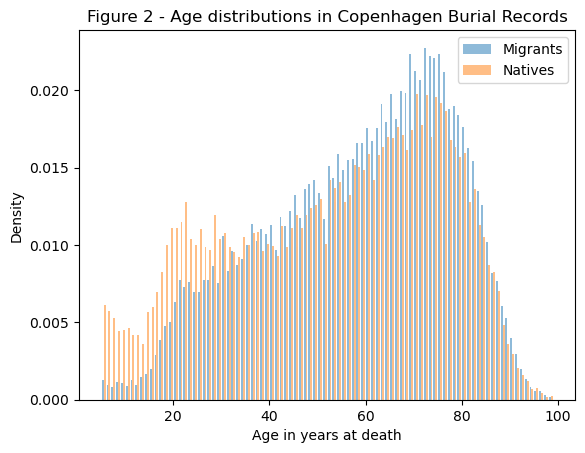

In [30]:
import matplotlib.pyplot as plt

plt.hist(
    [finaldata8[finaldata8['migrant'] == 1]['ageYears'].dropna(),
     finaldata8[finaldata8['migrant'] == 0]['ageYears'].dropna()],
    bins=range(5, 100),
    alpha=0.5,
    label=['Migrants',
           'Natives'],
    density=True
)


plt.xlabel('Age in years at death')
plt.ylabel('Density')
plt.title('Figure 2 - Age distributions in Copenhagen Burial Records')
plt.legend()


plt.show()


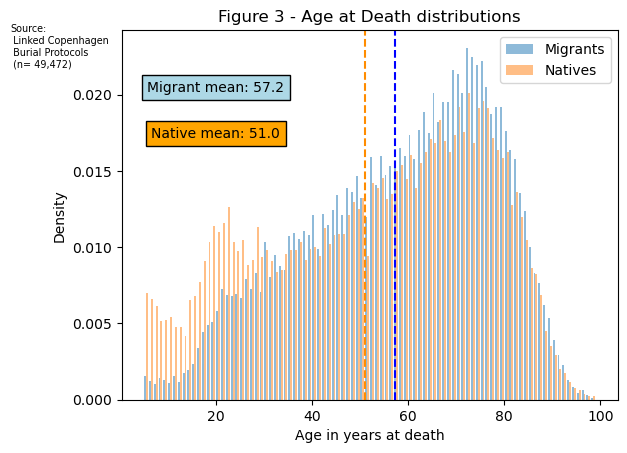

In [49]:
import matplotlib.pyplot as plt

# Filter the data based on the condition (finaldata8['year'] <= 1911)
filtered_data = finaldata8[finaldata8['year'] <= 1911]

# Calculate mean values
migrant_mean = filtered_data[filtered_data['migrant'] == 1]['ageYears'].mean()
native_mean = filtered_data[filtered_data['migrant'] == 0]['ageYears'].mean()

# Create the histogram
n, bins, patches = plt.hist(
    [filtered_data[filtered_data['migrant'] == 1]['ageYears'].dropna(),
     filtered_data[filtered_data['migrant'] == 0]['ageYears'].dropna()],
    bins=range(5, 100),
    alpha=0.5,
    label=['Migrants', 'Natives'],
    density=True
)

# Define colors for lines and text
line_colors = ['blue', 'darkorange']
text_colors = ['lightblue', 'orange']

# Add lines indicating the means
plt.axvline(migrant_mean, color=line_colors[0], linestyle='--', linewidth=1.5)
plt.axvline(native_mean, color=line_colors[1], linestyle='--', linewidth=1.5)

plt.text(20, 0.02, f"Migrant mean: {migrant_mean:.1f}",
         ha='center', va='bottom', bbox=dict(facecolor='lightblue', edgecolor='black'))
plt.text(20, 0.017, f"Native mean: {native_mean:.1f}",
         ha='center', va='bottom', bbox=dict(facecolor='orange', edgecolor='black'))

# Set labels and title
plt.xlabel('Age in years at death')
plt.ylabel('Density')
plt.title('Figure 3 - Age at Death distributions')

plt.annotate('Source:\n Linked Copenhagen\n Burial Protocols\n (n= 49,472)', xy=(-0.225, 0.9), xycoords='axes fraction', ha='left', size='x-small')
# Add legend
plt.legend()

# Show the plot
plt.show()

In [3]:
finaldata8 = pd.read_csv('finaldata8.csv')

C:\Users\juliu\AppData\Local\Temp\ipykernel_6412\3151772543.py:1: DtypeWarning: Columns (12,18,27,28,29,30,31,32,33,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  finaldata8 = pd.read_csv('finaldata8.csv')


In [84]:
respiratoryfreq = finaldata8[finaldata8['deathcause category'] == 'Pneumonia, Influenza, Bronchitis, and Respiratory Infections']['year'].value_counts() / finaldata8['year'].value_counts()

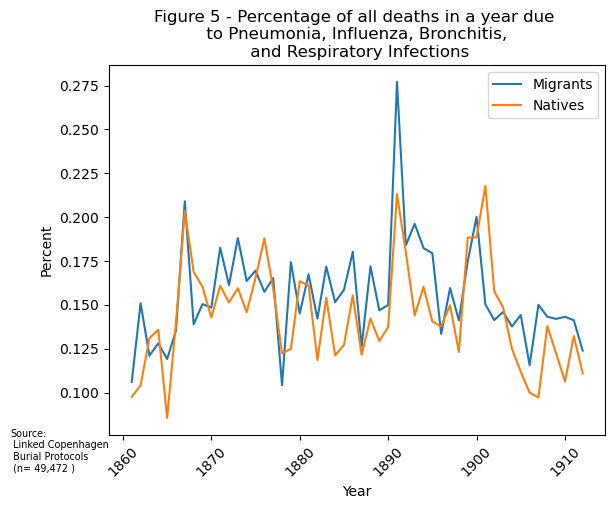

In [85]:
# Create the line plots
plt.plot(freq_per_year_migrant_1_normalized.index[freq_per_year_migrant_1_normalized.index <= 1912], freq_per_year_migrant_1_normalized[freq_per_year_migrant_1_normalized.index <= 1912], label='Migrants')
plt.plot(freq_per_year_migrant_0_normalized.index[freq_per_year_migrant_0_normalized.index <= 1912], freq_per_year_migrant_0_normalized[freq_per_year_migrant_0_normalized.index <= 1912], label='Natives')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Figure 5 - Percentage of all deaths in a year due \n to Pneumonia, Influenza, Bronchitis, \n and Respiratory Infections')

# Rotate x-axis tick labels if needed
plt.xticks(rotation=45)


plt.annotate('Source:\n Linked Copenhagen\n Burial Protocols\n (n= 49,472 )', xy=(-0.2, -0.1), xycoords='axes fraction', ha='left', size='x-small')

# Create a legend for the lines
plt.legend()

# Display the plot
plt.show()

In [13]:
count = finaldata8[finaldata8['year'] < 1912]['year'].count()
print(count)

49472


In [36]:
counts = finaldata8['year'].value_counts().sort_index()
pd.set_option('display.max_rows', None)
print(counts)

1860       7
1861     542
1862     453
1863     490
1864     486
1865     450
1866     430
1867     446
1868     411
1869     418
1870     475
1871     492
1872     501
1873     460
1874     460
1875     538
1876     534
1877     493
1878     449
1879     585
1880     927
1881     976
1882     866
1883     848
1884     847
1885    1395
1886    1460
1887    1431
1888    1447
1889    1449
1890    1473
1891    1608
1892    1471
1893    1381
1894    1413
1895    1382
1896    1235
1897    1409
1898    1329
1899    1472
1900    1520
1901    1401
1902    1113
1903    1055
1904    1098
1905    1182
1906    1130
1907    1127
1908    1215
1909    1173
1910    1210
1911    1309
1912     922
1913       1
1914     407
1915     178
1917       1
1918    1376
1919    1528
1920    1412
1921     396
1922     448
1929     442
1930    1186
1933       1
1934       1
1935     272
1936     568
1937    1802
1938    1770
1939    1798
1940     568
Name: year, dtype: int64


In [41]:
finaldata8[[finaldata8['year'] < 1912]['age']>5].value_counts()

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\juliu\AppData\Local\Temp\ipykernel_6412\3404615039.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  finaldata8[[finaldata8['year'] < 1912]['age']>5].value_counts()


TypeError: list indices must be integers or slices, not str

In [47]:
counts = finaldata8[(finaldata8['year'] < 1912) & (finaldata8['ageYears'] > 5)].shape[0]
print(counts)

48226


In [587]:
finaldata8[finaldata8['migrant']==0]['sex'].value_counts()

m    15138
f    13725
Name: sex, dtype: int64

In [586]:
18351/(18351+17174)

0.5165657987332865

In [44]:
finaldata8.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64549 entries, 0 to 64548
Data columns (total 144 columns):
 #    Column                     Non-Null Count  Dtype         
---   ------                     --------------  -----         
 0    source_ids                 64549 non-null  object        
 1    n_sources                  64549 non-null  int64         
 2    name_cl                    64549 non-null  object        
 3    name                       64549 non-null  object        
 4    first_names                63950 non-null  object        
 5    patronyms                  32800 non-null  object        
 6    family_names               25119 non-null  object        
 7    maiden_names               5999 non-null   object        
 8    all_patronyms              36563 non-null  object        
 9    all_family_names           26775 non-null  object        
 10   uncat_names                7078 non-null   object        
 11   sex                        64549 non-null  object   

In [5]:
finaldata8['dateOfDeath'] = pd.to_datetime(finaldata8['dateOfDeath'])
finaldata8['year'] = finaldata8['dateOfDeath'].dt.year

yearly_counts = finaldata8.groupby('year').size()
yearly_counts = yearly_counts.reset_index()
yearly_counts.columns = ['Year', 'Count']

In [551]:
finaldata8.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64549 entries, 0 to 64548
Data columns (total 143 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    source_ids                 64549 non-null  object 
 1    n_sources                  64549 non-null  int64  
 2    name_cl                    64549 non-null  object 
 3    name                       64549 non-null  object 
 4    first_names                63950 non-null  object 
 5    patronyms                  32800 non-null  object 
 6    family_names               25119 non-null  object 
 7    maiden_names               5999 non-null   object 
 8    all_patronyms              36563 non-null  object 
 9    all_family_names           26775 non-null  object 
 10   uncat_names                7078 non-null   object 
 11   sex                        64549 non-null  object 
 12   marital_status_1787s       7 non-null      object 
 13   age_1787s                  7 

In [588]:
finaldata8.sample(8)

,source_ids,n_sources,name_cl,name,first_names,patronyms,family_names,maiden_names,all_patronyms,all_family_names,uncat_names,sex,marital_status_1787s,age_1787s,birth_date,birth_year,birth_month,birth_day,event_date_1787s,birth_place_cl,birth_place,birth_location,birth_parish,birth_town,birth_county,birth_foreign_place,birth_country,event_parish_1787s,event_district_1787s,event_town_1787s,event_county_1787s,event_country_1787s,household_position_1787s,marital_status_1801s,age_1801s,event_date_1801s,event_parish_1801s,event_district_1801s,event_town_1801s,event_county_1801s,event_country_1801s,household_position_1801s,marital_status_1834s,age_1834s,event_date_1834s,event_parish_1834s,event_district_1834s,event_town_1834s,event_county_1834s,event_country_1834s,household_position_1834s,marital_status_1840s,age_1840s,event_date_1840s,event_parish_1840s,event_district_1840s,event_town_1840s,event_county_1840s,event_country_1840s,household_position_1840s,marital_status_1845s,age_1845s,event_date_1845s,event_parish_1845s,event_district_1845s,event_town_1845s,event_county_1845s,event_country_1845s,household_position_1845s,marital_status_1850s,age_1850s,event_date_1850s,event_parish_1850s,event_district_1850s,event_town_1850s,event_county_1850s,event_country_1850s,household_position_1850s,marital_status_1860s,age_1860s,event_date_1860s,event_parish_1860s,event_district_1860s,event_town_1860s,event_county_1860s,event_country_1860s,household_position_1860s,marital_status_1880s,age_1880s,event_date_1880s,event_parish_1880s,event_district_1880s,event_town_1880s,event_county_1880s,event_country_1880s,household_position_1880s,marital_status_1885s,age_1885s,event_date_1885s,event_district_1885s,event_town_1885s,event_county_1885s,event_country_1885s,household_position_1885s,marital_status_1901s,age_1901s,event_date_1901s,event_parish_1901s,event_district_1901s,event_town_1901s,event_county_1901s,event_country_1901s,household_position_1901s,ageYears,ageMonth,ageWeeks,ageDays,ageHours,dateOfDeath,deathplace,civilstatus,adressOutsideCph,comment,cemetary,chapel,parish,street,hood,street_number,letter,floor,institution,institution_street,institution_hood,institution_street_unique,institution_street_number,positions,relationtypes,workplaces,deathcauses,ICD-10 Code,deathcause category,migrant,year
33194,"8,9,10",3,amalie kirstine weilby,amalie kirstine melby,amalie kirstine,NaN,melby,NaN,NaN,melby,NaN,f,NaN,NaN,1849-01-30,1849.0,1.0,30.0,NaN,kjøbenhavn,københavn,NaN,NaN,københavn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ugift,36.0,1885-02-01,københavn,københavn,københavn,Danmark,barn,ugift,52.0,1901-02-01,NaN,københavn,københavn,københavn,Danmark,barn,71.0,NaN,NaN,NaN,NaN,1920-08-13,Sankt Josephs Hospital (St. Josefs Hospital) G...,Ugift,NaN,NaN,Assistens Kirkegård,Assistens Kirkegård - Kapel 6,Islands Brygges,Thorshavnsgade,Amager Vest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kommunelærerinde (Kommuneskolelærerinde),Eget erhverv,NaN,cancer hepatis et recti (cancer recti et hepatis),C78.7,Cancer,0.0,1920
4878,"7,10",2,johanne cecilie dorthea ludvigsen,johanne cecilie dorte ludvigsen,johanne cecilie dorte,ludvigsen,NaN,NaN,ludvigsen,NaN,NaN,f,NaN,NaN,NaN,1834.0,NaN,NaN,NaN,lyngby sogn københavns amt,lyngby sogn københavn amt,NaN,lyngby,NaN,københavn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ugift,46.0,1880-02-01,tamdrup,nim,NaN,skanderborg,Danmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,1900-10-09,NaN,Ugift,Christiandal Kloster,NaN,Assistens Kirkegård,"Assistens 

In [26]:
# Assuming finaldata8 is the name of your dataframe
finaldata8['deathcause category'] = finaldata8['deathcause category'].replace(
    {'Diseases of the digestive system(Peritonitis, intestinal disease, appendictis, gall bladder)': 'Diseases of the digestive system'}
)

In [27]:
# Assuming finaldata8 is the name of your dataframe
finaldata8['deathcause category'] = finaldata8['deathcause category'].replace(
    {'Pneumonia, Influenza, Bronchitis, and Respiratory Infections': 'Pneumonia, Influenza, respiratory inf.'})

In [28]:
deathcause_migrant = finaldata8[finaldata8['migrant'] == 1]['deathcause category'].value_counts()
deathcause_native = finaldata8[finaldata8['migrant'] == 0]['deathcause category'].value_counts()



In [52]:
deathcause_migrant = filtered_data[filtered_data['migrant'] == 1]['deathcause category'].value_counts()
deathcause_native = filtered_data[filtered_data['migrant'] == 0]['deathcause category'].value_counts()

In [48]:
finaldata8.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64549 entries, 0 to 64548
Data columns (total 144 columns):
 #    Column                     Non-Null Count  Dtype         
---   ------                     --------------  -----         
 0    source_ids                 64549 non-null  object        
 1    n_sources                  64549 non-null  int64         
 2    name_cl                    64549 non-null  object        
 3    name                       64549 non-null  object        
 4    first_names                63950 non-null  object        
 5    patronyms                  32800 non-null  object        
 6    family_names               25119 non-null  object        
 7    maiden_names               5999 non-null   object        
 8    all_patronyms              36563 non-null  object        
 9    all_family_names           26775 non-null  object        
 10   uncat_names                7078 non-null   object        
 11   sex                        64549 non-null  object   

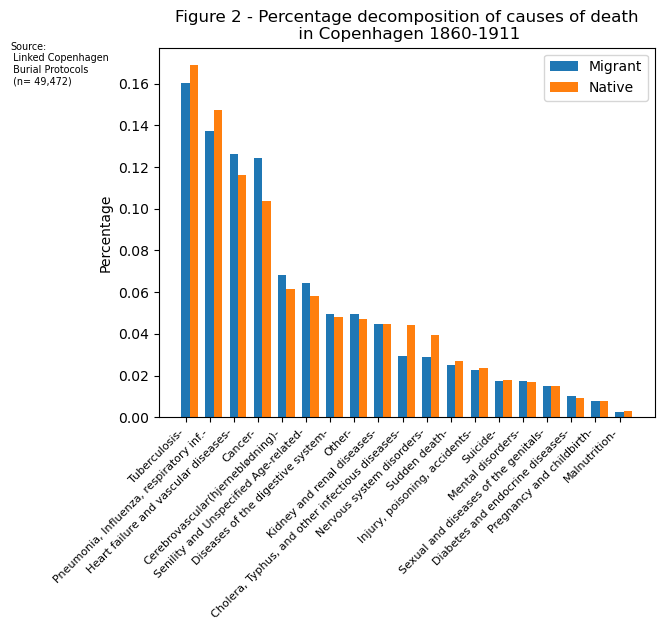

In [74]:

import matplotlib.pyplot as plt

# Filter the data based on the condition (finaldata8['year'] <= 1911)
filtered_data = finaldata8[finaldata8['year'] <= 1911]

# Set up the bar chart
width = 0.35  # Width of the bars
ind = list(range(len(deathcause_native)))  # Convert range to a list

# Create the figure and axes
fig, ax = plt.subplots()

# Create the bars for migrant population (switched order)
ax.bar(ind, deathcause_migrant.values / deathcause_migrant.values.sum(), width, label='Migrant')

# Create the bars for native population (switched order)
ax.bar([x + width for x in ind], deathcause_native.values / deathcause_native.values.sum(), width, label='Native')

# Set the labels, title, and legend
ax.set_ylabel('Percentage')
ax.set_title('Figure 2 - Percentage decomposition of causes of death\n in Copenhagen 1860-1911')
ax.set_xticks(ind)
ax.set_xticklabels([f'{label}-' for label in deathcause_native.index], rotation=45, ha='right', fontsize=8)  # Add '-' after the x-labels

# Move x-axis labels to the right
ax.tick_params(axis='x', labelright=True)
ax.annotate('Source:\n Linked Copenhagen\n Burial Protocols\n (n= 49,472)', xy=(-0.3, 0.9), xycoords='axes fraction', ha='left', size='x-small')
ax.legend()

# Display the bar chart
plt.show()

In [465]:
finaldata8.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64549 entries, 0 to 64548
Data columns (total 143 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    source_ids                 64549 non-null  object 
 1    n_sources                  64549 non-null  int64  
 2    name_cl                    64549 non-null  object 
 3    name                       64549 non-null  object 
 4    first_names                63950 non-null  object 
 5    patronyms                  32800 non-null  object 
 6    family_names               25119 non-null  object 
 7    maiden_names               5999 non-null   object 
 8    all_patronyms              36563 non-null  object 
 9    all_family_names           26775 non-null  object 
 10   uncat_names                7078 non-null   object 
 11   sex                        64549 non-null  object 
 12   marital_status_1787s       7 non-null      object 
 13   age_1787s                  7 

In [ ]:
finaldata9.info()

In [466]:
deathplace_migrant = finaldata8[finaldata8['migrant'] == 1]['hood'].value_counts()
deathplace_native = finaldata8[finaldata8['migrant'] == 0]['hood'].value_counts()

In [471]:
finaldata8['relationtypes'].value_counts()

Eget erhverv                                                                               34067
Ægtefælles erhverv                                                                         10927
Forhenværende/pensioneret                                                                   6218
Fars erhverv                                                                                2717
Ægtefælles forhenværende                                                                    1856
Eget erhverv,Eget erhverv                                                                    825
Eget erhverv,Ægtefælles forhenværende                                                        409
Eget erhverv,Forhenværende/pensioneret                                                       255
Eget erhverv,Ægtefælles erhverv                                                              209
Mors erhverv                                                                                 157
Forhenværende/pensioneret,Eget

In [469]:
deathplace_migrant

Indre By           11473
Nørrebro            6277
Vesterbro           3491
Østerbro            2233
Frederiksberg       1506
Christianshavn      1486
Amager Vest          614
Amager Øst           589
Valby                419
Bispebjerg           396
Gentofte             346
Vanløse              191
Brønshøj-Husum       177
Kongens Enghave      109
Name: hood, dtype: int64

In [470]:
deathplace_native

Indre By           11155
Nørrebro            5078
Vesterbro           2465
Østerbro            1435
Christianshavn      1395
Frederiksberg       1142
Amager Vest          404
Amager Øst           394
Valby                269
Gentofte             259
Bispebjerg           222
Vanløse              111
Brønshøj-Husum       103
Kongens Enghave       81
Vestrebro              1
Name: hood, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (15,) and arg 1 with shape (19,).

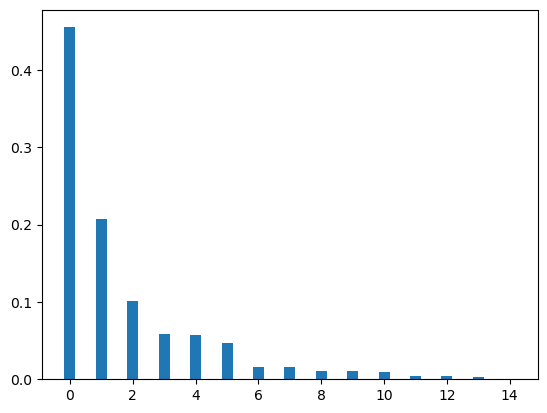

In [468]:
#mport matplotlib.pyplot as plt

# Set up the bar chart
width = 0.35  # Width of the bars
ind = list(range(len(deathplace_native)))  # Convert range to a list

# Create the figure and axes
fig, ax = plt.subplots()

# Create the bars for native population
ax.bar(ind, deathplace_native.values / deathplace_native.values.sum(), width, label='Native')

# Create the bars for migrant population
ax.bar([x + width for x in ind], deathcause_migrant.values / deathcause_migrant.values.sum(), width, label='Migrant')

# Set the labels, title, and legend
ax.set_xlabel('Causes of Death')
ax.set_ylabel('Frequencies')
ax.set_title('Frequencies of Causes of Death')
ax.set_xticks(ind)
ax.set_xticklabels(deathplace_native.index, rotation=45, ha='right', fontsize=8)  # Adjust rotation, alignment, and font size

# Move x-axis labels to the right
ax.tick_params(axis='x', labelright=True)

ax.legend()

# Display the bar chart
plt.show()

In [87]:
pd.set_option('display.max_rows', None)
print(finaldata8[finaldata8['migrant'] == 1]['event_district_1860s'].value_counts())

københavn             4456
sokkelund              422
lyngekronborg          279
odense                 199
hasle                  133
fleskum                129
støvring               126
merløse                103
sunds                   99
haderslev               98
nim                     98
als sønder              96
slagelse                84
sømme                   82
musse                   81
lyngefrederiksborg      79
lollands nørre          77
vester                  75
tønder højer og lø      73
vindinge                72
bårse                   69
rise                    69
nørre                   68
nybøl                   67
mønbo                   66
nørlyng                 66
tybjerg                 63
lundtoft                61
alsted                  58
horns                   58
elbo                    57
båg                     55
ærø                     54
falsters sønder         53
sallinge                53
nørvang                 52
als nørre               52
a

In [168]:
finaldata8.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64549 entries, 0 to 65504
Data columns (total 143 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    source_ids                 64549 non-null  object 
 1    n_sources                  64549 non-null  int64  
 2    name_cl                    64549 non-null  object 
 3    name                       64549 non-null  object 
 4    first_names                63950 non-null  object 
 5    patronyms                  32800 non-null  object 
 6    family_names               25119 non-null  object 
 7    maiden_names               5999 non-null   object 
 8    all_patronyms              36563 non-null  object 
 9    all_family_names           26775 non-null  object 
 10   uncat_names                7078 non-null   object 
 11   sex                        64549 non-null  object 
 12   marital_status_1787s       7 non-null      object 
 13   age_1787s                  7 

In [18]:
import re
import numpy as np
migrant_patterns_noamt = ['københavn', 'kjöbenhavn','kjøbenh','kjbhvn','kiøbh','kiøben','købhvn', 'kiöbh', 'kiöeben', 'khavn ',
                     'khvn','kbhv', 'kjøbh','kbh', 'i sognet','heri sognet']
migrant_patterns_all = ['frederiksberg', 'christianshavn', 'kristianshavn', 'sundby', 'sunby', 'valby', 'brønshøj', 'brøndshøj', 'brønshøi', 'brøndshøi', 'utterslev', 'vanløse', 'bispebjerg', 'emdrup',
                         'husum', 'fredrikbg',
                         'fredriksberg'  ]

def is_migrant(value):
    if pd.isna(value):
        return np.nan
    if 'amt' not in value:
        for pattern in migrant_patterns_noamt:
            if re.search(pattern, str(value), flags=re.IGNORECASE):
                return 0
    for pattern in migrant_patterns_all:
        if re.search(pattern, str(value), flags=re.IGNORECASE):
            return 0
    return 1

census1860['migrant'] = census1860['birth_place_cl'].apply(is_migrant)

In [17]:
census1860= pd.read_csv('C:/Users/juliu/Data/Kilder2/census1860s.csv')

C:\Users\juliu\AppData\Local\Temp\ipykernel_6928\513291185.py:1: DtypeWarning: Columns (30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  census1860= pd.read_csv('C:/Users/juliu/Data/Kilder2/census1860s.csv')


In [516]:
census1860.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748226 entries, 0 to 1748225
Data columns (total 42 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   pa_id                1748226 non-null  int64  
 1   name_cl              1747739 non-null  object 
 2   name                 1742784 non-null  object 
 3   first_names          1714479 non-null  object 
 4   patronyms            1395064 non-null  object 
 5   family_names         241719 non-null   object 
 6   maiden_names         52345 non-null    object 
 7   all_patronyms        1462755 non-null  object 
 8   all_family_names     259777 non-null   object 
 9   uncat_names          126937 non-null   object 
 10  sex                  1748226 non-null  object 
 11  marital_status       1742015 non-null  object 
 12  age                  1746767 non-null  float64
 13  birth_date           0 non-null        float64
 14  birth_year           1746767 non-null  float64
 15

In [635]:
census1860['migrant'].value_counts()

1.0    1248868
0.0     493650
Name: migrant, dtype: int64

In [2]:
import numpy as np

In [5]:
import pandas as pd

In [7]:
finaldata9 = pd.read_csv('finaldata9.csv')

C:\Users\juliu\AppData\Local\Temp\ipykernel_15776\2170911256.py:1: DtypeWarning: Columns (12,18,27,28,29,30,31,32,33,35,36,37,38,39,40,41,130) have mixed types. Specify dtype option on import or set low_memory=False.
  finaldata9 = pd.read_csv('finaldata9.csv')


In [8]:
finaldata9.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49472 entries, 0 to 49471
Data columns (total 144 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    source_ids                 49472 non-null  object 
 1    n_sources                  49472 non-null  int64  
 2    name_cl                    49472 non-null  object 
 3    name                       49472 non-null  object 
 4    first_names                49022 non-null  object 
 5    patronyms                  23973 non-null  object 
 6    family_names               20273 non-null  object 
 7    maiden_names               5285 non-null   object 
 8    all_patronyms              26828 non-null  object 
 9    all_family_names           21762 non-null  object 
 10   uncat_names                5489 non-null   object 
 11   sex                        49472 non-null  object 
 12   marital_status_1787s       7 non-null      object 
 13   age_1787s                  7 

In [483]:
census1787s['event_parish'].value_counts()

tikøb                      3156
tårnby                     3105
magleby                    2698
vejlby                     2399
dronninglund               2376
horne                      2310
asminderød                 2271
bregninge                  2097
store magleby              1926
køng                       1839
ørslev                     1824
ørum                       1781
ørsted                     1773
nordby                     1763
kongens lyngby             1761
udby                       1736
faxe                       1696
humble                     1637
vissenbjerg                1632
kalvehave                  1611
toreby                     1586
møgeltønder                1552
tårs                       1541
gentofte                   1526
åstrup                     1471
hørby                      1470
dråby                      1460
sæby                       1433
hillerslev                 1407
tved                       1380
østermarie                 1368
søllerød

In [19]:
import pandas as pd

# Assuming you have the "census1860" dataframe

# Filter observations with 'event_district' as 'københavn'
filter_kobenhavn = census1860['event_district'] == 'københavn'

# Filter observations with 'event_district' as 'sokkelund' and 'event_parish' as 'staden københavn'
filter_sokkelund = (census1860['event_district'] == 'sokkelund') & (census1860['event_parish'] == 'staden københavn')

# Apply the filters and keep the desired observations
filtered_df2 = census1860[filter_kobenhavn | filter_sokkelund]

In [472]:
import pandas as pd

file_paths = [
    'C:/Users/juliu/Data/Kilder2/census1787s.csv',
    'C:/Users/juliu/Data/Kilder2/census1801s.csv',
    'C:/Users/juliu/Data/Kilder2/census1834s.csv',
    'C:/Users/juliu/Data/Kilder2/census1840s.csv',
    'C:/Users/juliu/Data/Kilder2/census1845s.csv',
    'C:/Users/juliu/Data/Kilder2/census1850s.csv',
    'C:/Users/juliu/Data/Kilder2/census1860s.csv',
    'C:/Users/juliu/Data/Kilder2/census1880s.csv',
    'C:/Users/juliu/Data/Kilder2/census1885s.csv',
    'C:/Users/juliu/Data/Kilder2/census1901s.csv'
]

dataframes = {}

for file_path in file_paths:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Drop duplicates based on 'name_cl' and 'birth_place_cl'
    df.drop_duplicates(subset=['name_cl', 'birth_place_cl'], keep='first', inplace=True)

    # Store the DataFrame in the dictionary
    dataframes[file_path] = df

C:\Users\juliu\AppData\Local\Temp\ipykernel_14084\1208269113.py:20: DtypeWarning: Columns (6,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


KeyboardInterrupt: 

In [637]:
filtered_df['migrant'].value_counts()

0.0    83768
1.0    66423
Name: migrant, dtype: int64

In [638]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151497 entries, 327337 to 529443
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pa_id                151497 non-null  int64  
 1   name_cl              151491 non-null  object 
 2   name                 151326 non-null  object 
 3   first_names          146264 non-null  object 
 4   patronyms            68507 non-null   object 
 5   family_names         52583 non-null   object 
 6   maiden_names         12693 non-null   object 
 7   all_patronyms        80346 non-null   object 
 8   all_family_names     57270 non-null   object 
 9   uncat_names          23977 non-null   object 
 10  sex                  151497 non-null  object 
 11  marital_status       150990 non-null  object 
 12  age                  151123 non-null  float64
 13  birth_date           0 non-null       float64
 14  birth_year           151123 non-null  float64
 15  birth_month 

In [663]:
# Round ages to the nearest full year
filtered_df['rounded_age'] = filtered_df['age'].apply(lambda x: round(x))

# Calculate the population in each rounded age for migrants (migrant == 1)
s_population_migrant = filtered_df[filtered_df['migrant'] == 1]['rounded_age'].value_counts().sort_index()

total_population_migrant = s_population_migrant.sum()

standard_population_migrant = s_population_migrant / total_population_migrant

# Calculate the population in each rounded age for non-migrants (migrant != 1)
s_population_nonmigrant = filtered_df[filtered_df['migrant'] != 1]['rounded_age'].value_counts().sort_index()

total_population_nonmigrant = s_population_nonmigrant.sum()

standard_population_nonmigrant = s_population_nonmigrant / total_population_nonmigrant

print("Migrants:")
print(standard_population_migrant)

print("Non-Migrants:")
print(standard_population_nonmigrant)

Migrants:
0      0.000106
1      0.002866
2      0.003921
3      0.004494
4      0.004796
5      0.004434
6      0.004902
7      0.005369
8      0.005143
9      0.004675
10     0.005550
11     0.005656
12     0.006199
13     0.005942
14     0.005837
15     0.007466
16     0.009728
17     0.011115
18     0.013800
19     0.015821
20     0.019697
21     0.020376
22     0.024191
23     0.030842
24     0.045004
25     0.036573
26     0.032893
27     0.030179
28     0.027585
29     0.027193
30     0.027992
31     0.024538
32     0.025458
33     0.024689
34     0.025850
35     0.022562
36     0.023241
37     0.022743
38     0.022608
39     0.020934
40     0.022577
41     0.017284
42     0.017827
43     0.016967
44     0.016303
45     0.015429
46     0.013136
47     0.012065
48     0.013031
49     0.012804
50     0.014102
51     0.010542
52     0.010648
53     0.009833
54     0.009713
55     0.008401
56     0.009094
57     0.008205
58     0.007948
59     0.008808
60     0.009517
61     0.00610

In [664]:
finaldata8[finaldata8['migrant'] == 1]['ageYears'].dropna(),
finaldata8[finaldata8['migrant'] == 0]['ageYears'].dropna()

In [672]:
import numpy as np

# Convert 'ageYears' column to numeric and replace non-numeric values with NaN
finaldata8['ageYears'] = pd.to_numeric(finaldata8['ageYears'], errors='coerce')

# Create age intervals of 3 years starting from 0 up to the maximum age in your dataset
max_age = np.nanmax(finaldata8['ageYears'])
age_intervals = pd.cut(finaldata8['ageYears'], bins=range(0, int(max_age) + 4, 3), labels=False, right=False)

# Calculate the total number of individuals in each age interval for migrants and natives
migrant_population = finaldata8[finaldata8['migrant'] == 1].groupby(age_intervals)['ageYears'].size()
native_population = finaldata8[finaldata8['migrant'] == 0].groupby(age_intervals)['ageYears'].size()



In [651]:
print(migrant_mortality_rates)

ageYears
0.0     1.0
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0
5.0     1.0
6.0     1.0
7.0     1.0
8.0     1.0
9.0     1.0
10.0    1.0
11.0    1.0
12.0    1.0
13.0    1.0
14.0    1.0
15.0    1.0
16.0    1.0
17.0    1.0
18.0    1.0
19.0    1.0
20.0    1.0
21.0    1.0
22.0    1.0
23.0    1.0
24.0    1.0
25.0    1.0
26.0    1.0
27.0    1.0
28.0    1.0
29.0    1.0
30.0    1.0
31.0    1.0
32.0    1.0
33.0    1.0
Name: ageYears, dtype: float64


In [189]:
filtered_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151497 entries, 327337 to 529443
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pa_id                151497 non-null  int64  
 1   name_cl              151491 non-null  object 
 2   name                 151326 non-null  object 
 3   first_names          146264 non-null  object 
 4   patronyms            68507 non-null   object 
 5   family_names         52583 non-null   object 
 6   maiden_names         12693 non-null   object 
 7   all_patronyms        80346 non-null   object 
 8   all_family_names     57270 non-null   object 
 9   uncat_names          23977 non-null   object 
 10  sex                  151497 non-null  object 
 11  marital_status       150990 non-null  object 
 12  age                  151123 non-null  float64
 13  birth_date           0 non-null       float64
 14  birth_year           151123 non-null  float64
 15  birth_month 

In [20]:
columns_to_drop = ['migrant', 'first_names', 'patronyms', 'family_names', 'maiden_names', 'all_patronyms', 'all_family_names', 'uncat_names', 
                   'sex', 'birth_date', 'birth_year', 'birth_month', 'birth_day', 'birth_place', 'birth_location', 'birth_parish', 'birth_town', 'birth_county',
                    'birth_country', 'birth_foreign_place', ]

finaldata9 = finaldata8.drop(columns_to_drop, axis=1)


In [21]:
df = pd.merge(filtered_df2, finaldata9, on=['name_cl', 'birth_place_cl'], how='left')

In [22]:
df  = df.drop_duplicates(subset=['name_cl', 'birth_place_cl'])

In [7]:
finaldata8 = pd.read_csv('finaldata8.csv')

C:\Users\juliu\AppData\Local\Temp\ipykernel_6928\3151772543.py:1: DtypeWarning: Columns (12,18,27,28,29,30,31,32,33,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  finaldata8 = pd.read_csv('finaldata8.csv')


In [9]:
pd.set_option()

finaldata9.sample(8)

,source_ids,n_sources,name_cl,name,first_names,patronyms,family_names,maiden_names,all_patronyms,all_family_names,...,institution_street_unique,institution_street_number,positions,relationtypes,workplaces,deathcauses,ICD-10 Code,deathcause category,migrant,year
46029,"12,7,13,13,13,9,10,11",8,lars torvald hvenegaard,laurs torvald vegner,laurs torvald,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Skibstømrer,Forhenværende/pensioneret,NaN,cancer pylori,C16.0,Cancer,1.0,1909
2118,"3,4,5,6,7,8,10",7,petrine maria,petrine marie,petrine marie,NaN,lund,NaN,jensen,lund,...,NaN,NaN,Enkefrue,Eget erhverv,NaN,"bronchitis (bronkitis),emphysema (emphysem, em...",J43.9,"Pneumonia, Influenza, respiratory inf.",0.0,1891
24359,"5,6,7,10",4,marie lovise sørensen,marie louise sørensen,marie louise,sørensen,NaN,NaN,sørensen,NaN,...,NaN,NaN,NaN,NaN,NaN,pneumonia (pneumoni),J18.9,"Pneumonia, Influenza, respiratory inf.",0.0,1882
7660,"7,10",2,frederikke olesen født jensen,frederikke olesen født jensen,frederikke,olesen,NaN,jensen,olesen jensen,NaN,...,Nansensgade,1.0,NaN,NaN,NaN,hydrops,P83.9,Pregnancy and childbirth,1.0,1882
45917,"8,10",2,inga barfod rostrup,inga barfod rostrup,inga,NaN,rostrup,NaN,NaN,rostrup,...,NaN,NaN,Overretssagfører,Fars erhverv,NaN,"lungebetændelse,lungehindebetændelse",J90,"Pneumonia, Influenza, respiratory inf.",0.0,1896
15613,"5,14,6,10",4,frederik christian wilhelm,frederik kristian vilhelm,frederik kristian vilhelm,NaN,NaN,NaN,rasmusen,NaN,...,NaN,NaN,Urtekræmmersvend,Eget erhverv,NaN,hjertesygdom,I51.9,Heart failure and vascular diseases,0.0,1865
38918,"13,7,8,10",4,hans emil christoffer wendelboe,hans emil kristoffer vendelbo,hans emil kristoffer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Handelsagent,Eget erhverv,NaN,pneumonia (pneumoni),J18.9,"Pneumonia, Influenza, respiratory inf.",1.0,1886
12580,"3,4,5,6,10",5,ole peter thorsen,ole peter torsen,ole peter,torsen,NaN,NaN,torsen,NaN,...,NaN,NaN,Klædehandler,Eget erhverv,NaN,hjernesygdom,G93.9,Nervous system disorders,1.0,1863


In [23]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151497 entries, 0 to 161864
Data columns (total 165 columns):
 #    Column                     Non-Null Count   Dtype  
---   ------                     --------------   -----  
 0    pa_id                      151497 non-null  int64  
 1    name_cl                    151491 non-null  object 
 2    name_x                     151326 non-null  object 
 3    first_names                146264 non-null  object 
 4    patronyms                  68507 non-null   object 
 5    family_names               52583 non-null   object 
 6    maiden_names               12693 non-null   object 
 7    all_patronyms              80346 non-null   object 
 8    all_family_names           57270 non-null   object 
 9    uncat_names                23977 non-null   object 
 10   sex                        151497 non-null  object 
 11   marital_status             150990 non-null  object 
 12   age                        151123 non-null  float64
 13   birth_date  

In [33]:
import statsmodels.api as sm
import pandas as pd

# Create the 'death' column based on the presence of values in 'ageYears'
df['death'] = df['ageYears'].notnull().astype(int)

# Specify the dependent and independent variables
dependent_var = 'death'
independent_vars = ['ageYears', 'migrant', 'sex_m']

# Drop rows with missing values in any of the independent variables
df = df.dropna(subset=independent_vars + [dependent_var])

# Create the design matrix by adding a constant term to the independent variables
X = sm.add_constant(df[independent_vars])

# Extract the dependent variable
y = df[dependent_var]

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics
print(results.summary())

ValueError: zero-size array to reduction operation maximum which has no identity

In [34]:
print(df.shape)

(0, 166)


In [30]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151497 entries, 0 to 161864
Data columns (total 166 columns):
 #    Column                     Non-Null Count   Dtype  
---   ------                     --------------   -----  
 0    pa_id                      151497 non-null  int64  
 1    name_cl                    151491 non-null  object 
 2    name_x                     151326 non-null  object 
 3    first_names                146264 non-null  object 
 4    patronyms                  68507 non-null   object 
 5    family_names               52583 non-null   object 
 6    maiden_names               12693 non-null   object 
 7    all_patronyms              80346 non-null   object 
 8    all_family_names           57270 non-null   object 
 9    uncat_names                23977 non-null   object 
 10   marital_status             150990 non-null  object 
 11   age                        151123 non-null  float64
 12   birth_date                 0 non-null       float64
 13   birth_year  

In [24]:
import numpy as np
import pandas as pd

# Create the 'death' column based on the presence of values in 'ageYears'
df['death'] = np.where(df['ageYears'].notnull(), 1, 0)

# Display the updated DataFrame
df.head()

,pa_id,name_cl,name_x,first_names,patronyms,family_names,maiden_names,all_patronyms,all_family_names,uncat_names,sex,marital_status,age,birth_date,birth_year,birth_month,birth_day,event_date,event_year,event_month,event_day,birth_place_cl,birth_place,birth_location,birth_parish,birth_town,birth_county,birth_foreign_place,birth_country,event_location,event_parish,event_district,event_town,event_county,event_country,household_id,household_position,role,event_type,book_id,image_id,image_appearance,migrant,source_ids,n_sources,name_y,marital_status_1787s,age_1787s,event_date_1787s,event_parish_1787s,event_district_1787s,event_town_1787s,event_county_1787s,event_country_1787s,household_position_1787s,marital_status_1801s,age_1801s,event_date_1801s,event_parish_1801s,event_district_1801s,event_town_1801s,event_county_1801s,event_country_1801s,household_position_1801s,marital_status_1834s,age_1834s,event_date_1834s,event_parish_1834s,event_district_1834s,event_town_1834s,event_county_1834s,event_country_1834s,household_position_1834s,marital_status_1840s,age_1840s,event_date_1840s,event_parish_1840s,event_district_1840s,event_town_1840s,event_county_1840s,event_country_1840s,household_position_1840s,marital_status_1845s,age_1845s,event_date_1845s,event_parish_1845s,event_district_1845s,event_town_1845s,event_county_1845s,event_country_1845s,household_position_1845s,marital_status_1850s,age_1850s,event_date_1850s,event_parish_1850s,event_district_1850s,event_town_1850s,event_county_1850s,event_country_1850s,household_position_1850s,marital_status_1860s,age_1860s,event_date_1860s,event_parish_1860s,event_district_1860s,event_town_1860s,event_county_1860s,event_country_1860s,household_position_1860s,marital_status_1880s,age_1880s,event_date_1880s,event_parish_1880s,event_district_1880s,event_town_1880s,event_county_1880s,event_country_1880s,household_position_1880s,marital_status_1885s,age_1885s,event_date_1885s,event_district_1885s,event_town_1885s,event_county_1885s,event_country_1885s,household_position_1885s,marital_status_1901s,age_1901s,event_date_1901s,event_parish_1901s,event_district_1901s,event_town_1901s,event_county_1901s,event_country_1901s,household_position_1901s,ageYears,ageMonth,ageWeeks,ageDays,ageHours,dateOfDeath,deathplace,civilstatus,adressOutsideCph,comment,cemetary,chapel,parish,street,hood,street_number,letter,floor,institution,institution_street,institution_hood,institution_street_unique,institution_street_number,positions,relationtypes,workplaces,deathcauses,ICD-10 Code,deathcause category,year,death
0,416321,adolph lund,adolf lund,adolf,NaN,lund,NaN,NaN,lund,NaN,m,enke,60.0,NaN,1800.0,NaN,NaN,1860-02-01,1860,2,1,moss norge,norge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,staden københavn,sokkelund,NaN,københavn,Danmark,67054,NaN,NaN,census,316,Optællingsliste A-C,36,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,327337,emilie lund,emilie lund,emilie,NaN,lund,NaN,NaN,lund,NaN,f,ugift,29.0,NaN,1831.0,NaN,NaN,1860-02-01,1860,2,1,københavn,københavn,NaN,NaN,københavn,NaN,NaN,NaN,NaN,staden københavn,sokkelund,NaN,københavn,Danmark,67054,barn,NaN,census,316,Optællingsliste A-C,37,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [108]:
df.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151497 entries, 0 to 161864
Data columns (total 165 columns):
 #    Column                     Non-Null Count   Dtype         
---   ------                     --------------   -----         
 0    pa_id                      151497 non-null  int64         
 1    name_cl                    151491 non-null  object        
 2    name_x                     151326 non-null  object        
 3    first_names                146264 non-null  object        
 4    patronyms                  68507 non-null   object        
 5    family_names               52583 non-null   object        
 6    maiden_names               12693 non-null   object        
 7    all_patronyms              80346 non-null   object        
 8    all_family_names           57270 non-null   object        
 9    uncat_names                23977 non-null   object        
 10   sex                        151497 non-null  object        
 11   marital_status             150990 non

In [128]:
df['age'] = df['age'].round()


In [132]:
dflife['ageYears'] = dflife['ageYears'].round()

In [133]:
age_counterz =dflife.groupby('ageYears').size()
print(age_counterz)

ageYears
0.0        5
1.0       19
2.0       25
3.0       31
4.0       29
5.0       25
6.0       33
7.0       26
8.0       26
9.0       25
10.0      17
11.0      23
12.0      15
13.0      17
14.0      22
15.0      20
16.0      25
17.0      38
18.0      49
19.0      50
20.0      44
21.0      60
22.0      73
23.0      48
24.0      53
25.0      54
26.0      51
27.0      41
28.0      73
29.0      47
30.0      55
31.0      47
32.0      48
33.0      57
34.0      71
35.0      69
36.0      60
37.0      75
38.0      81
39.0      90
40.0      97
41.0      84
42.0     108
43.0      85
44.0     107
45.0      93
46.0      95
47.0     104
48.0     118
49.0     131
50.0     138
51.0     104
52.0     122
53.0     120
54.0     143
55.0     135
56.0     110
57.0     160
58.0     175
59.0     154
60.0     158
61.0     142
62.0     173
63.0     181
64.0     174
65.0     204
66.0     201
67.0     197
68.0     191
69.0     201
70.0     231
71.0     196
72.0     244
73.0     191
74.0     196
75.0     233
76.

In [135]:
age_counter_migrant1 = dflife[dflife['migrant'] == 1].groupby('ageYears').size()
age_counter_migrant0 = dflife[dflife['migrant'] == 0].groupby('ageYears').size()

In [129]:

age_counter =df.groupby('age').size()
print(age_counter)

age
0.0        58
1.0      3549
2.0      3453
3.0      3149
4.0      2993
5.0      2861
6.0      2737
7.0      2615
8.0      2449
9.0      2321
10.0     2519
11.0     2318
12.0     2427
13.0     2202
14.0     2098
15.0     2090
16.0     2170
17.0     2224
18.0     2350
19.0     2493
20.0     2824
21.0     2715
22.0     2984
23.0     3402
24.0     4454
25.0     3771
26.0     3487
27.0     3209
28.0     3035
29.0     3004
30.0     3189
31.0     2749
32.0     2873
33.0     2676
34.0     2852
35.0     2600
36.0     2702
37.0     2580
38.0     2606
39.0     2452
40.0     2758
41.0     2077
42.0     2141
43.0     2030
44.0     1967
45.0     1899
46.0     1719
47.0     1558
48.0     1556
49.0     1555
50.0     1670
51.0     1271
52.0     1292
53.0     1231
54.0     1249
55.0     1154
56.0     1160
57.0     1063
58.0     1017
59.0     1039
60.0     1192
61.0      811
62.0      815
63.0      744
64.0      709
65.0      624
66.0      597
67.0      541
68.0      547
69.0      499
70.0      522
71

In [130]:


total_population = age_counter.sum()
age_proportions = age_counter / total_population
age_proportions = age_proportions.round(3)
print(age_proportions)

age
0.0      0.000
1.0      0.023
2.0      0.023
3.0      0.021
4.0      0.020
5.0      0.019
6.0      0.018
7.0      0.017
8.0      0.016
9.0      0.015
10.0     0.017
11.0     0.015
12.0     0.016
13.0     0.015
14.0     0.014
15.0     0.014
16.0     0.014
17.0     0.015
18.0     0.016
19.0     0.016
20.0     0.019
21.0     0.018
22.0     0.020
23.0     0.023
24.0     0.029
25.0     0.025
26.0     0.023
27.0     0.021
28.0     0.020
29.0     0.020
30.0     0.021
31.0     0.018
32.0     0.019
33.0     0.018
34.0     0.019
35.0     0.017
36.0     0.018
37.0     0.017
38.0     0.017
39.0     0.016
40.0     0.018
41.0     0.014
42.0     0.014
43.0     0.013
44.0     0.013
45.0     0.013
46.0     0.011
47.0     0.010
48.0     0.010
49.0     0.010
50.0     0.011
51.0     0.008
52.0     0.009
53.0     0.008
54.0     0.008
55.0     0.008
56.0     0.008
57.0     0.007
58.0     0.007
59.0     0.007
60.0     0.008
61.0     0.005
62.0     0.005
63.0     0.005
64.0     0.005
65.0     0.004
66.0  

In [137]:
total_death_migrant1 = age_counter_migrant1.sum()
death_proportions_migrant1 = age_counter_migrant1 / total_death_migrant1
death_proportions_migrant1 = death_proportions_migrant1.round(3)

total_death_migrant0 = age_counter_migrant0.sum()
death_proportions_migrant0 = age_counter_migrant0 / total_death_migrant0
death_proportions_migrant0 = death_proportions_migrant0.round(3)

print("Death Proportions for Migrant = 1:")
print(death_proportions_migrant1)

print("Death Proportions for Migrant = 0:")
print(death_proportions_migrant0)

Death Proportions for Migrant = 0:
ageYears
0.0      0.001
1.0      0.003
2.0      0.004
3.0      0.005
4.0      0.005
5.0      0.004
6.0      0.005
7.0      0.004
8.0      0.004
9.0      0.004
10.0     0.003
11.0     0.003
12.0     0.002
13.0     0.003
14.0     0.003
15.0     0.003
16.0     0.004
17.0     0.005
18.0     0.007
19.0     0.008
20.0     0.007
21.0     0.009
22.0     0.012
23.0     0.007
24.0     0.008
25.0     0.008
26.0     0.007
27.0     0.006
28.0     0.009
29.0     0.007
30.0     0.008
31.0     0.007
32.0     0.006
33.0     0.008
34.0     0.009
35.0     0.008
36.0     0.006
37.0     0.009
38.0     0.009
39.0     0.011
40.0     0.011
41.0     0.009
42.0     0.012
43.0     0.011
44.0     0.012
45.0     0.010
46.0     0.011
47.0     0.013
48.0     0.013
49.0     0.015
50.0     0.015
51.0     0.011
52.0     0.014
53.0     0.014
54.0     0.014
55.0     0.015
56.0     0.012
57.0     0.018
58.0     0.018
59.0     0.016
60.0     0.016
61.0     0.014
62.0     0.018
63.0     0.

In [131]:
print(dflife['ageYears'])

42         74.0
60         55.0
85         68.0
100        60.0
153        66.0
161        39.0
177        63.0
191        70.0
194        79.0
242        66.0
321        73.0
331        57.0
366        42.0
368        39.0
374        82.0
391        63.0
401        50.0
461        73.0
531         7.0
538        76.0
547        67.0
584        67.0
586        33.0
593        77.0
599        62.0
601        49.0
613        68.0
632        29.0
639        77.0
646         NaN
650        28.0
695        11.0
715        57.0
745        78.0
748        52.0
757        48.0
763        59.0
767        39.0
784        76.0
790        44.0
799        40.0
815        63.0
865        60.0
885        66.0
891        33.0
908        64.0
921        15.0
960        57.0
976        70.0
986        55.0
992        46.0
993        74.0
994        66.0
999        34.0
1004       66.0
1014       66.0
1045       53.0
1051       32.0
1063       65.0
1080       15.0
1087       69.0
1152       75.0
1154    

In [ ]:
migrant_deathage = dflife[dflife['migrant'] == 1].groupby('ageYears').size()
native_deathage = dflife[dflife['migrant'] == 0].groupby('ageYears').size()

In [96]:
new_index = pd.Index(range(101))

# Reindex the Series with the new index and fill missing values with 0
age_counter = age_counter.reindex(new_index, fill_value=0)

print(age_counter)

0         0
1      3548
2      3453
3      3149
4      2993
5      2861
6      2737
7      2615
8      2449
9      2321
10     2470
11     2318
12     2427
13     2202
14     2098
15     2090
16     2170
17     2224
18     2350
19     2493
20     2803
21     2715
22     2984
23     3402
24     4454
25     3771
26     3487
27     3209
28     3035
29     3004
30     3178
31     2749
32     2873
33     2676
34     2852
35     2600
36     2702
37     2580
38     2606
39     2452
40     2747
41     2077
42     2141
43     2030
44     1967
45     1899
46     1719
47     1558
48     1556
49     1555
50     1661
51     1271
52     1292
53     1231
54     1249
55     1154
56     1160
57     1063
58     1017
59     1039
60     1182
61      811
62      815
63      744
64      709
65      624
66      597
67      541
68      547
69      499
70      516
71      344
72      348
73      302
74      275
75      235
76      217
77      199
78      159
79      137
80      160
81      102
82       93
83  

In [91]:
dflife.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9255 entries, 42 to 161833
Columns: 166 entries, pa_id to time_to_event
dtypes: datetime64[ns](2), float64(27), int64(8), object(129)
memory usage: 11.8+ MB


In [62]:
import pandas as pd

# Assuming 'dflife' is the DataFrame containing the 'age' and 'migrant' columns

# Filter the DataFrame for rows where 'migrant' is equal to 1
migrant_1_df = df[df['migrant'] == 1]

# Round each value in the 'age' column to the nearest whole number for the migrant == 1 DataFrame
rounded_age_column_migrant_full1 = migrant_1_df['age'].round()

# Count the occurrences of each whole number for migrant == 1 and convert it to a Series
counts_series_migrant_full1 = pd.Series(rounded_age_column_migrant_1).value_counts()

# Filter the DataFrame for rows where 'migrant' is equal to 0
migrant_0_df = df[df['migrant'] == 0]

# Round each value in the 'age' column to the nearest whole number for the migrant == 0 DataFrame
rounded_age_column_migrant_0 = migrant_0_df['age'].round()

# Count the occurrences of each whole number for migrant == 0 and convert it to a Series
counts_series_migrant_full0 = pd.Series(rounded_age_column_migrant_0).value_counts()

# Print the counts for each whole number for migrant == 1
print("Counts for migrant == 1:")
print(counts_series_migrant_1)
print()

# Print the counts for each whole number for migrant == 0
print("Counts for migrant == 0:")
print(counts_series_migrant_0)

NameError: name 'rounded_age_column_migrant_1' is not defined

In [63]:
dflife = df.dropna(subset=['deathcause category']).copy()

In [78]:
finaldata8.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64549 entries, 0 to 64548
Data columns (total 144 columns):
 #    Column                     Non-Null Count  Dtype         
---   ------                     --------------  -----         
 0    source_ids                 64549 non-null  object        
 1    n_sources                  64549 non-null  int64         
 2    name_cl                    64549 non-null  object        
 3    name                       64549 non-null  object        
 4    first_names                63950 non-null  object        
 5    patronyms                  32800 non-null  object        
 6    family_names               25119 non-null  object        
 7    maiden_names               5999 non-null   object        
 8    all_patronyms              36563 non-null  object        
 9    all_family_names           26775 non-null  object        
 10   uncat_names                7078 non-null   object        
 11   sex                        64549 non-null  object   

In [82]:
finaldata9 = finaldata8.loc[finaldata8['year'] < 1912]

In [83]:
finaldata9.to_csv('finaldata9.csv', index=False)

In [80]:
finaldata8.to_csv('finaldata8.csv', index=False)

In [86]:
dflife.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9255 entries, 42 to 161833
Data columns (total 166 columns):
 #    Column                     Non-Null Count  Dtype         
---   ------                     --------------  -----         
 0    pa_id                      9255 non-null   int64         
 1    name_cl                    9255 non-null   object        
 2    name_x                     9255 non-null   object        
 3    first_names                9176 non-null   object        
 4    patronyms                  3884 non-null   object        
 5    family_names               4141 non-null   object        
 6    maiden_names               744 non-null    object        
 7    all_patronyms              4391 non-null   object        
 8    all_family_names           4389 non-null   object        
 9    uncat_names                905 non-null    object        
 10   sex                        9255 non-null   object        
 11   marital_status             9232 non-null   object  

In [64]:
dflife['dateOfDeath'] = pd.to_datetime(dflife['dateOfDeath'])
dflife['event_date'] = pd.to_datetime(dflife['event_date'])

In [65]:
dflife['time_to_event'] = (dflife['dateOfDeath'] - dflife['event_date']).dt.days // 365

In [795]:
print(dflife['age'].value_counts())

40.0     236
1.0      218
2.0      201
36.0     190
43.0     189
3.0      184
39.0     183
38.0     183
45.0     174
42.0     171
44.0     164
41.0     162
37.0     161
7.0      160
50.0     160
32.0     160
31.0     157
5.0      155
34.0     154
6.0      154
46.0     151
29.0     148
30.0     148
4.0      147
47.0     146
33.0     144
35.0     142
49.0     142
27.0     138
48.0     135
9.0      134
8.0      133
24.0     133
26.0     132
53.0     128
25.0     123
28.0     123
60.0     121
54.0     119
51.0     116
10.0     114
23.0     114
22.0     111
52.0     110
58.0     110
55.0     109
20.0     109
56.0     108
57.0     108
12.0     106
11.0      98
13.0      98
63.0      97
59.0      96
14.0      96
18.0      94
16.0      92
61.0      91
19.0      89
21.0      88
15.0      88
62.0      80
17.0      80
66.0      67
64.0      62
67.0      61
70.0      58
68.0      57
65.0      56
69.0      53
72.0      50
71.0      35
76.0      32
73.0      30
74.0      28
77.0      23
78.0      22

In [66]:
dflife = dflife.drop(dflife[dflife['age'] == 100.5].index)

In [77]:
dflife = dflife.drop_duplicates(subset=['name_cl', 'birth_place_cl'])

KeyError: Index(['firstnames', 'lastname'], dtype='object')

In [70]:
print(dflife['age'].value_counts().sum())

9249


In [54]:
dflife.info()

NameError: name 'dflife' is not defined

In [780]:
import pandas as pd

# Assuming 'dflife' is your DataFrame
dflife['time_to_event'] = dflife['time_to_event'] // 365

In [71]:
dflife.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9255 entries, 42 to 161833
Data columns (total 166 columns):
 #    Column                     Non-Null Count  Dtype         
---   ------                     --------------  -----         
 0    pa_id                      9255 non-null   int64         
 1    name_cl                    9255 non-null   object        
 2    name_x                     9255 non-null   object        
 3    first_names                9176 non-null   object        
 4    patronyms                  3884 non-null   object        
 5    family_names               4141 non-null   object        
 6    maiden_names               744 non-null    object        
 7    all_patronyms              4391 non-null   object        
 8    all_family_names           4389 non-null   object        
 9    uncat_names                905 non-null    object        
 10   sex                        9255 non-null   object        
 11   marital_status             9232 non-null   object  

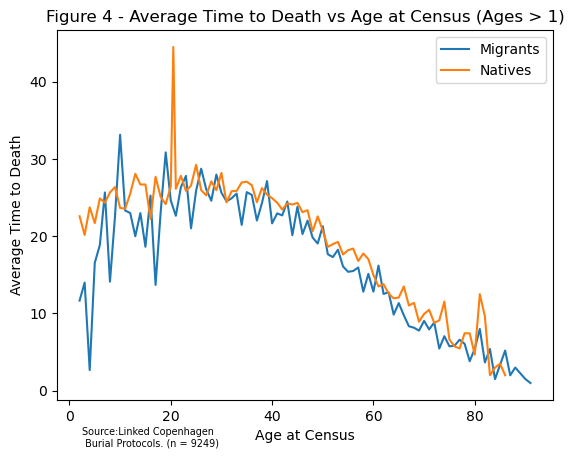

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dflife' is the name of your dataframe
# Replace it with the actual name if necessary

# Filter the dataframe for rows where 'year' < 1912
filtered_dflife = dflife[dflife['year'] < 1912]

# Calculate the average 'time_to_event' for each age group based on 'migrant'
avg_time_to_event = filtered_dflife.groupby(['migrant', 'age'])['time_to_event'].mean().reset_index()

# Filter the dataframe for ages above 5
avg_time_to_event_filtered = avg_time_to_event[avg_time_to_event['age'] > 1]

# Filter the dataframe for migrant == 1
migrant_1_avg = avg_time_to_event_filtered[avg_time_to_event_filtered['migrant'] == 1]

# Filter the dataframe for migrant == 0
migrant_0_avg = avg_time_to_event_filtered[avg_time_to_event_filtered['migrant'] == 0]

# Create the graph
plt.plot(migrant_1_avg['age'], migrant_1_avg['time_to_event'], label='Migrants')
plt.plot(migrant_0_avg['age'], migrant_0_avg['time_to_event'], label='Natives')
plt.xlabel('Age at Census')
plt.ylabel('Average Time to Death')
plt.title('Figure 4 - Average Time to Death vs Age at Census (Ages > 1)')
plt.legend()
plt.annotate('Source:Linked Copenhagen\n Burial Protocols. (n = 9249)', xy=(0.05, -0.125), xycoords='axes fraction', ha='left', size='x-small')
# Show the graph
plt.show()

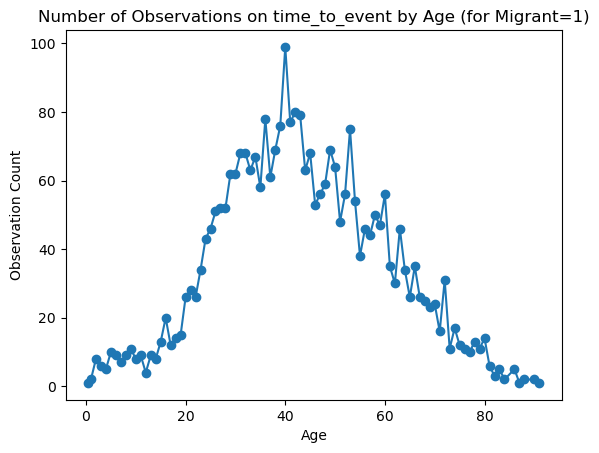

In [899]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dflife' with columns 'time_to_event', 'age', 'migrant', and 'native'
count_by_age_migrant1 = dflife[dflife['migrant'] == 1]['age'].value_counts().sort_index()

# Plotting the count by age for migrant=1
plt.plot(count_by_age_migrant1.index, count_by_age_migrant1.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Observation Count')
plt.title('Number of Observations on time_to_event by Age (for Migrant=1)')
plt.show()


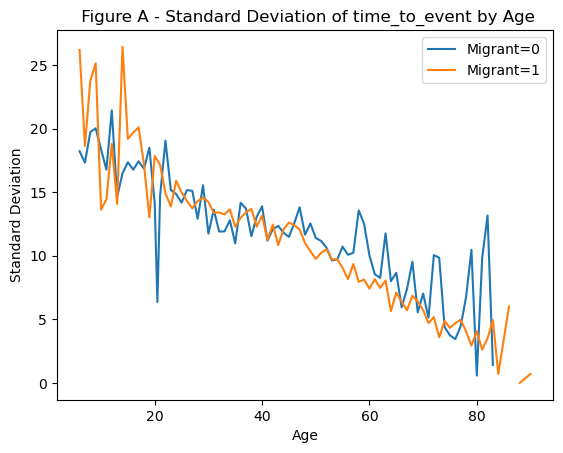

In [890]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dflife' with columns 'time_to_event', 'age', and 'migrant'
filtered_dflife = dflife[(dflife['age'] > 5) & (dflife['age'] < 99)]

std_by_age_migrant0 = filtered_dflife[filtered_dflife['migrant'] == 0].groupby('age')['time_to_event'].std()
std_by_age_migrant1 = filtered_dflife[filtered_dflife['migrant'] == 1].groupby('age')['time_to_event'].std()

# Plotting the standard deviation by age for migrant=0
plt.plot(std_by_age_migrant0.index, std_by_age_migrant0.values, label='Migrant=0')

# Plotting the standard deviation by age for migrant=1
plt.plot(std_by_age_migrant1.index, std_by_age_migrant1.values, label='Migrant=1')

plt.xlabel('Age')
plt.ylabel('Standard Deviation')
plt.title(' Figure A - Standard Deviation of time_to_event by Age')
plt.legend()
plt.show()

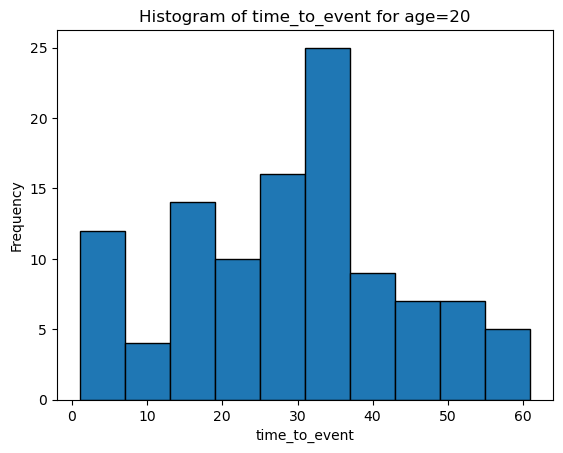

In [870]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dflife' with columns 'time_to_event' and 'age'
data = dflife.loc[dflife['age'] == 20, 'time_to_event']

# Plot histogram
plt.hist(data, bins=10, edgecolor='black')
plt.xlabel('time_to_event')
plt.ylabel('Frequency')
plt.title('Histogram of time_to_event for age=20')
plt.show()

In [875]:
dflife['time_to_event']

41        40
59         4
84        40
99        25
151       22
159        3
174       38
188       28
191       48
239       46
318       18
328       46
363       37
365       38
371       20
388       31
398       13
458       31
528       26
535       26
544       28
581       37
583       30
590       37
596       40
598        9
610       60
629       13
636       31
643       78
647       16
692       32
712       13
742       40
745       48
754       20
760       29
764        8
781       21
787       42
796       37
812       37
862       26
882       40
888       31
905        6
918       13
957       29
973       39
982       13
988       13
989       37
990       27
995       47
1000      13
1010      15
1041      24
1047      16
1059      25
1076       5
1083      47
1148      13
1150      16
1179       1
1188      25
1196      25
1198      17
1277      29
1303      77
1338      34
1358      12
1366      27
1370      28
1388      22
1417      35
1421      28
1422      18

In [729]:
import pandas as pd

# Assuming 'dflife' is the DataFrame containing the 'age' and 'migrant' columns

# Filter the DataFrame for rows where 'migrant' is equal to 1
migrant_1_df = dflife[dflife['migrant'] == 1]

# Round each value in the 'age' column to the nearest whole number for the migrant == 1 DataFrame
rounded_age_column_migrant_1 = migrant_1_df['age'].round()

# Count the occurrences of each whole number for migrant == 1 and convert it to a Series
counts_series_migrant_1 = pd.Series(rounded_age_column_migrant_1).value_counts()

# Filter the DataFrame for rows where 'migrant' is equal to 0
migrant_0_df = dflife[dflife['migrant'] == 0]

# Round each value in the 'age' column to the nearest whole number for the migrant == 0 DataFrame
rounded_age_column_migrant_0 = migrant_0_df['age'].round()

# Count the occurrences of each whole number for migrant == 0 and convert it to a Series
counts_series_migrant_0 = pd.Series(rounded_age_column_migrant_0).value_counts()

# Print the counts for each whole number for migrant == 1
print("Counts for migrant == 1:")
print(counts_series_migrant_1)
print()

# Print the counts for each whole number for migrant == 0
print("Counts for migrant == 0:")
print(counts_series_migrant_0)

Counts for migrant == 1:
40.0    99
42.0    80
43.0    79
36.0    78
41.0    77
39.0    76
53.0    75
49.0    69
38.0    69
31.0    68
45.0    68
32.0    68
34.0    67
50.0    64
44.0    63
33.0    63
30.0    62
29.0    62
37.0    61
48.0    59
35.0    58
60.0    56
52.0    56
47.0    56
54.0    54
46.0    53
27.0    52
28.0    52
26.0    51
58.0    50
51.0    48
59.0    47
25.0    46
56.0    46
63.0    46
57.0    44
24.0    43
55.0    38
66.0    35
61.0    35
64.0    34
23.0    34
72.0    31
62.0    30
21.0    28
22.0    26
65.0    26
67.0    26
20.0    26
68.0    25
70.0    24
69.0    23
16.0    20
74.0    17
71.0    16
19.0    15
18.0    14
80.0    14
15.0    13
78.0    13
17.0    12
75.0    12
79.0    11
73.0    11
9.0     11
76.0    11
5.0     10
77.0    10
8.0      9
13.0     9
11.0     9
6.0      9
10.0     8
14.0     8
2.0      8
7.0      7
3.0      6
81.0     6
83.0     5
4.0      5
86.0     5
12.0     4
82.0     3
84.0     2
88.0     2
1.0      2
90.0     2
0.0      1
87.0   

In [735]:
age_intervals = list(range(0, 101)) 

In [748]:
migrant_deathage = dflife[dflife['migrant'] == 1].groupby('ageYears').size()
native_deathage = dflife[dflife['migrant'] == 0].groupby('ageYears').size()

In [749]:
print(migrant_deathage)

ageYears
1.0        2
2.0        2
5.0        2
6.0        4
7.0        2
8.0        1
9.0        1
10.0       1
11.0       4
12.0       1
13.0       1
14.0       1
15.0       1
16.0       2
17.0       5
18.0       7
19.0       3
20.0       3
21.0       5
22.0       2
23.0       6
24.0       7
25.0       4
26.0       8
27.0       4
28.0      16
29.0       6
30.0       7
31.0       6
32.0      11
33.0      11
34.0      13
35.0      18
36.0      21
37.0      22
38.0      23
39.0      24
40.0      27
41.0      27
42.0      34
43.0      19
44.0      32
45.0      33
46.0      26
47.0      25
48.0      39
49.0      41
50.0      43
51.0      38
52.0      35
53.0      34
54.0      58
55.0      43
56.0      36
57.0      47
58.0      65
59.0      56
60.0      58
61.0      54
62.0      63
63.0      75
64.0      58
65.0      81
66.0      52
67.0      83
68.0      80
69.0      83
70.0     105
71.0      85
72.0      99
73.0      86
74.0      69
75.0      93
76.0      91
77.0      73
78.0      79
79.

In [714]:
counts_series_migrant_0
counts_series_migrant_1

40.227722772277225

In [751]:
def calculate_average_age(age_count_series):
    total_count = 0
    weighted_sum = 0

    for age, count in age_count_series.items():
        total_count += count
        weighted_sum += age * count

    average_age = weighted_sum / total_count
    return average_age


average_age = calculate_average_age(migrant_deathage)
print("Average Age:", average_age)

Average Age: 63.95523872679045


In [716]:
counts_series_migrant_0.mean()

73.45544554455445

In [695]:
print(counts_series_migrant_1)

40.0    99
42.0    80
43.0    79
36.0    78
41.0    77
39.0    76
53.0    75
49.0    69
38.0    69
31.0    68
45.0    68
32.0    68
34.0    67
50.0    64
44.0    63
33.0    63
30.0    62
29.0    62
37.0    61
48.0    59
35.0    58
60.0    56
52.0    56
47.0    56
54.0    54
46.0    53
27.0    52
28.0    52
26.0    51
58.0    50
51.0    48
59.0    47
25.0    46
56.0    46
63.0    46
57.0    44
24.0    43
55.0    38
66.0    35
61.0    35
64.0    34
23.0    34
72.0    31
62.0    30
21.0    28
22.0    26
65.0    26
67.0    26
20.0    26
68.0    25
70.0    24
69.0    23
16.0    20
74.0    17
71.0    16
19.0    15
18.0    14
80.0    14
15.0    13
78.0    13
17.0    12
75.0    12
79.0    11
73.0    11
9.0     11
76.0    11
5.0     10
77.0    10
8.0      9
13.0     9
11.0     9
6.0      9
10.0     8
14.0     8
2.0      8
7.0      7
3.0      6
81.0     6
83.0     5
4.0      5
86.0     5
12.0     4
82.0     3
84.0     2
88.0     2
1.0      2
90.0     2
0.0      1
87.0     1
91.0     1
Name: age,

In [753]:
import pandas as pd


# Create a new index range from 0 to 100
new_index = pd.Index(range(101))

# Reindex the Series with the new index and fill missing values with 0
native_deathage = native_deathage.reindex(new_index, fill_value=0)

print(native_deathage)


0        5
1       17
2       23
3       31
4       29
5       23
6       29
7       24
8       25
9       24
10      16
11      19
12      14
13      16
14      21
15      19
16      23
17      33
18      42
19      46
20      41
21      55
22      71
23      42
24      46
25      50
26      43
27      37
28      57
29      41
30      48
31      41
32      37
33      46
34      58
35      51
36      39
37      53
38      58
39      66
40      69
41      57
42      74
43      66
44      75
45      60
46      69
47      79
48      80
49      90
50      93
51      66
52      87
53      86
54      85
55      92
56      73
57     113
58     110
59      98
60     100
61      87
62     109
63     106
64     116
65     123
66     149
67     114
68     111
69     118
70     126
71     111
72     144
73     105
74     127
75     140
76     118
77      94
78     120
79     100
80     102
81      90
82      97
83      84
84      75
85      50
86      51
87      49
88      28
89      26
90      18

In [741]:
all_values = pd.Series(range(101))

# Combine the initial series with the complete range and fill missing counts with 0
migrant_deathage = migrant_deathage.combine_first(all_values).fillna(0)

# Print the updated series
print(native_deathage)

0.0        5.0
1.0       17.0
2.0       23.0
3.0       31.0
4.0       29.0
5.0       23.0
6.0       29.0
7.0       24.0
8.0       25.0
9.0       24.0
10.0      16.0
11.0      19.0
12.0      14.0
13.0      16.0
14.0      21.0
15.0      19.0
16.0      23.0
17.0      33.0
18.0      42.0
19.0      46.0
20.0      41.0
21.0      55.0
22.0      71.0
23.0      42.0
24.0      46.0
25.0      50.0
26.0      43.0
27.0      37.0
28.0      57.0
29.0      41.0
30.0      48.0
31.0      41.0
32.0      37.0
33.0      46.0
34.0      58.0
35.0      51.0
36.0      39.0
37.0      53.0
38.0      58.0
39.0      66.0
40.0      69.0
41.0      57.0
42.0      74.0
43.0      66.0
44.0      75.0
45.0      60.0
46.0      69.0
47.0      79.0
48.0      80.0
49.0      90.0
50.0      93.0
51.0      66.0
52.0      87.0
53.0      86.0
54.0      85.0
55.0      92.0
56.0      73.0
57.0     113.0
58.0     110.0
59.0      98.0
60.0     100.0
61.0      87.0
62.0     109.0
63.0     106.0
64.0     116.0
65.0     123.0
66.0     1

In [710]:
print(ages)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [711]:
ages = list(range(0, 101)) 

In [754]:
dflife2 = pd.DataFrame({
    'age': ages,
    'n_x': counts_series_migrant_1,
    'd_x': migrant_deathage })

# Calculate central death rate (m_x)
dflife2['m_x'] = dflife2['d_x'] / dflife2['n_x']

# Calculate l_x
dflife2['l_x'] = 1 - dflife2['m_x'].cumsum()

# Calculate T_x
dflife2['T_x'] = dflife2['l_x'][::-1].cumsum()

# Calculate e_x
dflife2['e_x'] = dflife2['T_x'] / dflife2['l_x']

print(dflife2)

     age  n_x  d_x        m_x         l_x  T_x  e_x
0      0    1    0   0.000000    1.000000 -inf -inf
1      1    2    2   1.000000    0.000000 -inf -inf
2      2    8    2   0.250000   -0.250000 -inf  inf
3      3    6    0   0.000000   -0.250000 -inf  inf
4      4    5    0   0.000000   -0.250000 -inf  inf
5      5   10    2   0.200000   -0.450000 -inf  inf
6      6    9    4   0.444444   -0.894444 -inf  inf
7      7    7    2   0.285714   -1.180159 -inf  inf
8      8    9    1   0.111111   -1.291270 -inf  inf
9      9   11    1   0.090909   -1.382179 -inf  inf
10    10    8    1   0.125000   -1.507179 -inf  inf
11    11    9    4   0.444444   -1.951623 -inf  inf
12    12    4    1   0.250000   -2.201623 -inf  inf
13    13    9    1   0.111111   -2.312734 -inf  inf
14    14    8    1   0.125000   -2.437734 -inf  inf
15    15   13    1   0.076923   -2.514658 -inf  inf
16    16   20    2   0.100000   -2.614658 -inf  inf
17    17   12    5   0.416667   -3.031324 -inf  inf
18    18   1

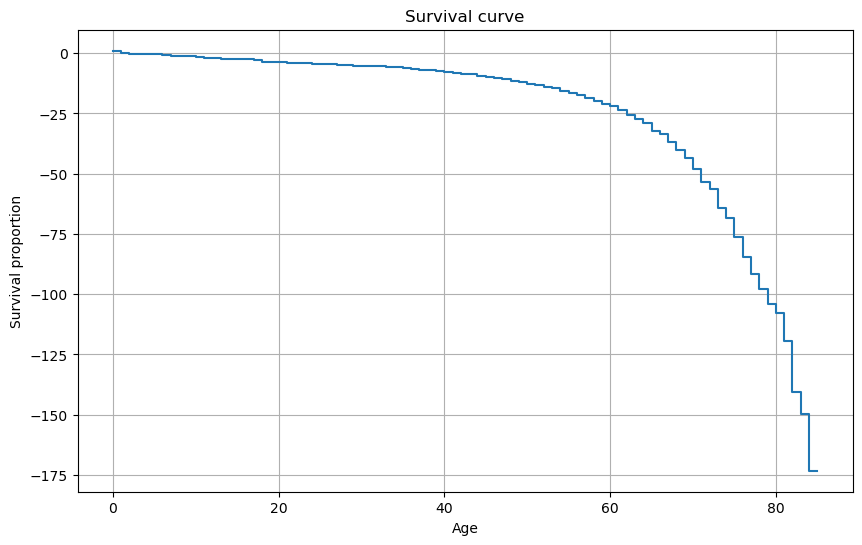

In [755]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.step(dflife2['age'], dflife2['l_x'], where='post')
plt.xlabel('Age')
plt.ylabel('Survival proportion')
plt.title('Survival curve')
plt.grid(True)
plt.show()

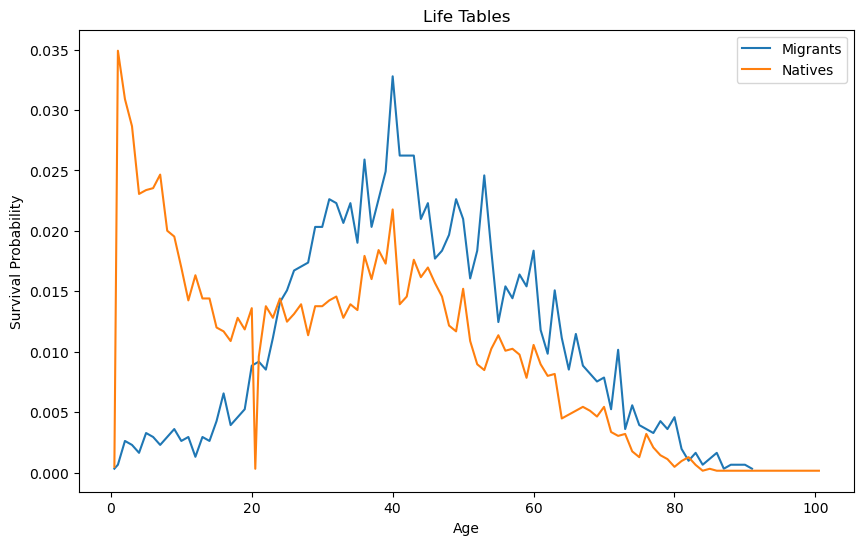

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(life_table_migrants, label='Migrants')
plt.plot(life_table_natives, label='Natives')
plt.title('Life Tables')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

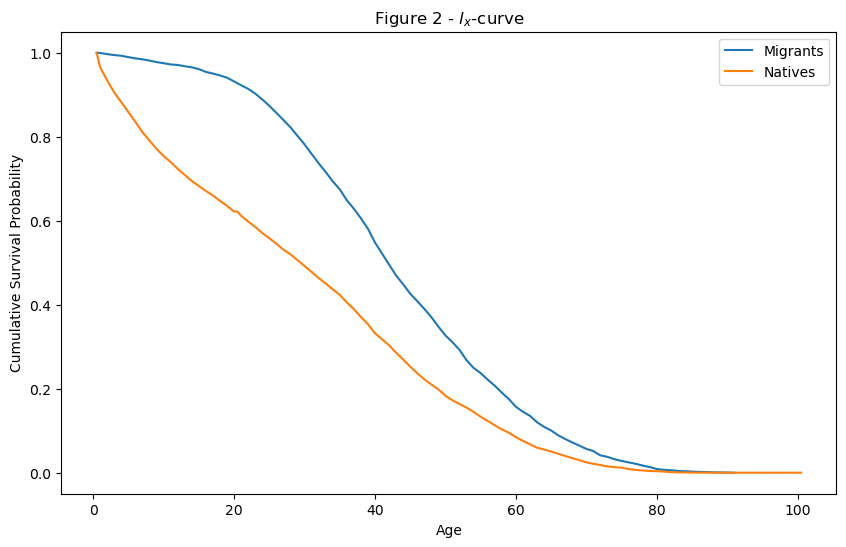

In [235]:
import matplotlib.pyplot as plt

# Calculate cumulative survival probability (starting from 1 and decreasing)
cumulative_survival_migrants = 1 - life_table_migrants.cumsum()
cumulative_survival_natives = 1 - life_table_natives.cumsum()

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(cumulative_survival_migrants.index, cumulative_survival_migrants, label='Migrants')
plt.plot(cumulative_survival_natives.index, cumulative_survival_natives, label='Natives')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Cumulative Survival Probability')
plt.title( 'Figure 2 - $l_x$-curve')
plt.legend()

# Display the plot
plt.show()


In [ ]:
finaldata8[finaldata8['migrant'] == 1]['deathcause category']

In [268]:
df['yearOfDeath'].isnull()

In [271]:
nan_count = df['yearOfDeath'].isnull().sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 0
